In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFRegressor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc , accuracy_score
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [2]:
df1=pd.read_excel("C:/Users/yaazhisai/Desktop/copper/Copper_Set.xlsx")

In [3]:
df1['item_date_1']=pd.to_datetime(df1['item_date'],format='%Y%m%d', errors='coerce').dt.date

In [4]:
df1['delivery date_1']=pd.to_datetime(df1['delivery date'],format='%Y%m%d',errors='coerce').dt.date

In [5]:
df1['delivery date_1']=pd.to_datetime(df1['delivery date_1'])

In [6]:
df1['delv_day']=df1['delivery date_1'].dt.day
df1['delv_month']=df1['delivery date_1'].dt.month
df1['delv_year']=df1['delivery date_1'].dt.year


In [7]:
df1['item_date_1']=pd.to_datetime(df1['item_date_1'])

In [8]:
df1['item_day']=df1['item_date_1'].dt.day
df1['item_month']=df1['item_date_1'].dt.month
df1['item_year']=df1['item_date_1'].dt.year

In [9]:
df1['material_ref']=df1['material_ref'].astype('string')

In [10]:
df1['material_ref'].bfill()

0                                      DEQ1 S460MC
1         0000000000000000000000000000000000104991
2                                         S0380700
3                          DX51D+ZM310MAO 2.3X1317
4                                  2_S275JR+AR-CL1
                            ...                   
181668    0000000000000000000000000000000001000777
181669    0000000000000000000000000000000001000227
181670    0000000000000000000000000000000001004216
181671    0000000000000000000000000000000001001149
181672    0000000000000000000000000000000001005439
Name: material_ref, Length: 181673, dtype: string

In [11]:
df1['material_ref'].isnull().sum()

77919

In [12]:
df1['material_ref']=df1['material_ref'].apply(lambda x:np.nan if str(x).startswith('00000') else x)

In [13]:
#missing null values
# for numerical columns

df1['country']=df1['country'].fillna(df1['country'].mean())
df1['customer']=df1['customer'].fillna(df1['customer'].median())
df1['application']=df1['application'].fillna(df1['application'].median())
df1['thickness']=df1['thickness'].fillna(df1['thickness'].median())
df1['selling_price']=df1['selling_price'].fillna(df1['selling_price'].median())
df1['delivery date']=df1['delivery date'].fillna(df1['delivery date'].median())
df1['item_date_1']=df1['item_date_1'].fillna(df1['item_date_1'].median())
df1['item_day']=df1['item_day'].fillna(df1['item_day'].median())
df1['item_month']=df1['item_month'].fillna(df1['item_month'].median())
df1['item_year']=df1['item_year'].fillna(df1['item_year'].median())
df1['delv_day']=df1['delv_day'].fillna(df1['delv_day'].median())
df1['delv_month']=df1['delv_month'].fillna(df1['delv_month'].median())
df1['delv_year']=df1['delv_year'].fillna(df1['delv_year'].median())
#df1['quantity tons']=df1['quantity tons'].fillna(df1['quantity tons'].median())

# for categorical columns
df1['status']=df1['status'].fillna(df1['status'].mode()[0])
df1['delivery date_1']=df1['delivery date_1'].fillna(df1['delivery date_1'].mode()[0])

In [14]:
df1['item_day']=df1['item_day'].astype('int64')
df1['item_month']=df1['item_month'].astype('int64')
df1['item_year']=df1['item_year'].astype('int64')

In [15]:
df1['delv_day']=df1['delv_day'].astype('int64')
df1['delv_month']=df1['delv_month'].astype('int64')
df1['delv_year']=df1['delv_year'].astype('int64')

In [16]:
df1['quantity tons']=pd.to_numeric(df1['quantity tons'],errors='coerce')

In [17]:
df1['quantity tons']=df1['quantity tons'].apply(lambda x:np.nan if x<=0 else x)
df1['selling_price']=df1['selling_price'].apply(lambda x:np.nan if x<=0 else x)

In [18]:
# ordinalencoder is for feature column
# 2d array format
df1['item type']=OrdinalEncoder().fit_transform(df1[['item type']])

In [19]:
#Labelencoder is for Target column
# instead can use map function also


df1['status']=LabelEncoder().fit_transform(df1['status'])

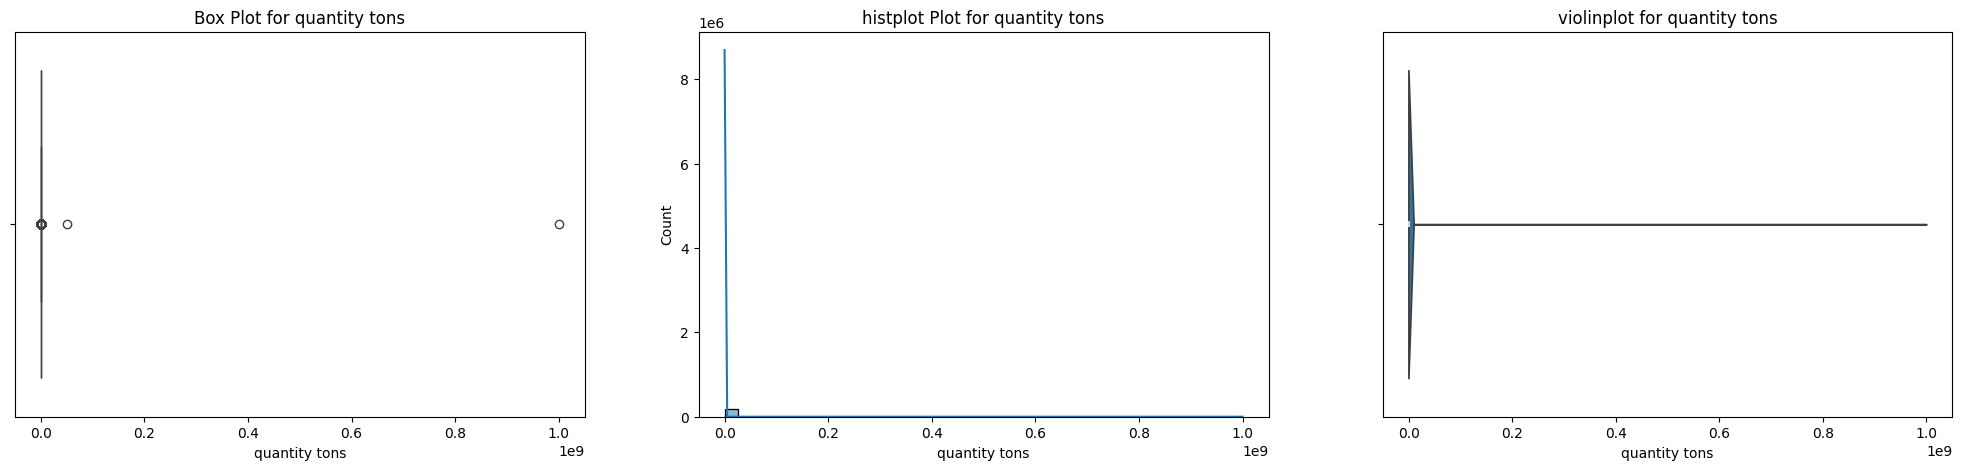

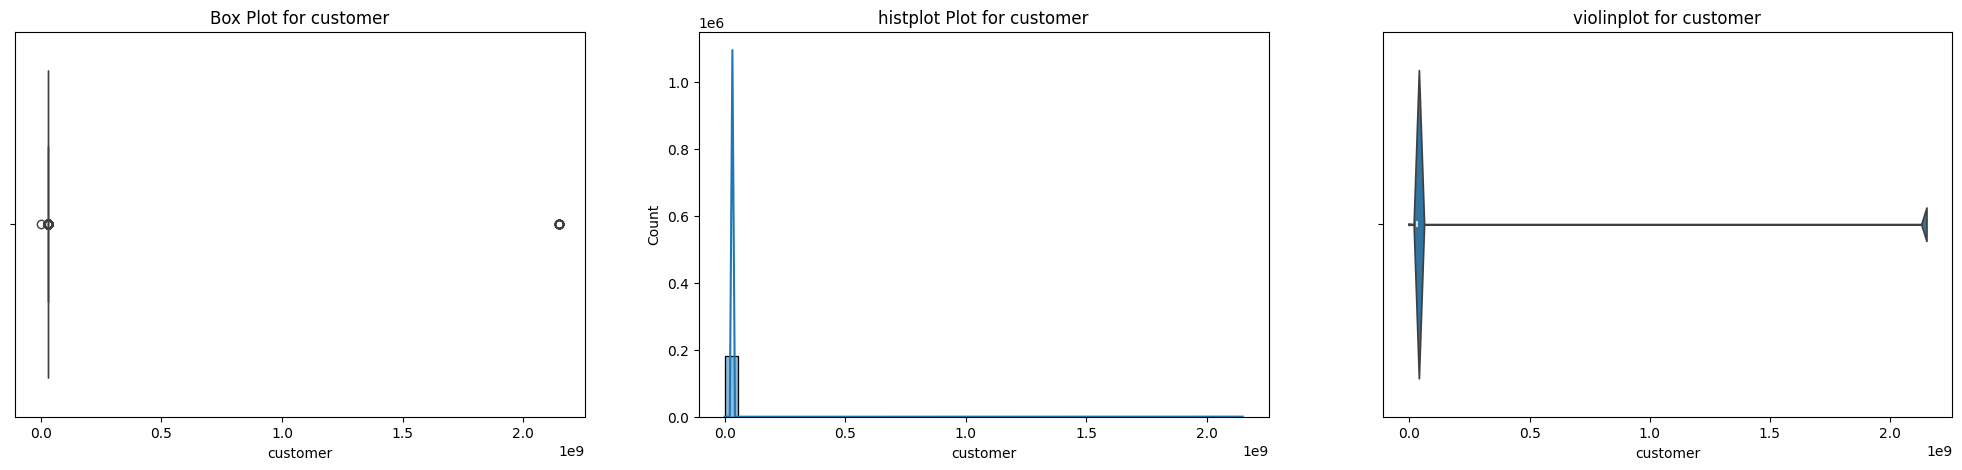

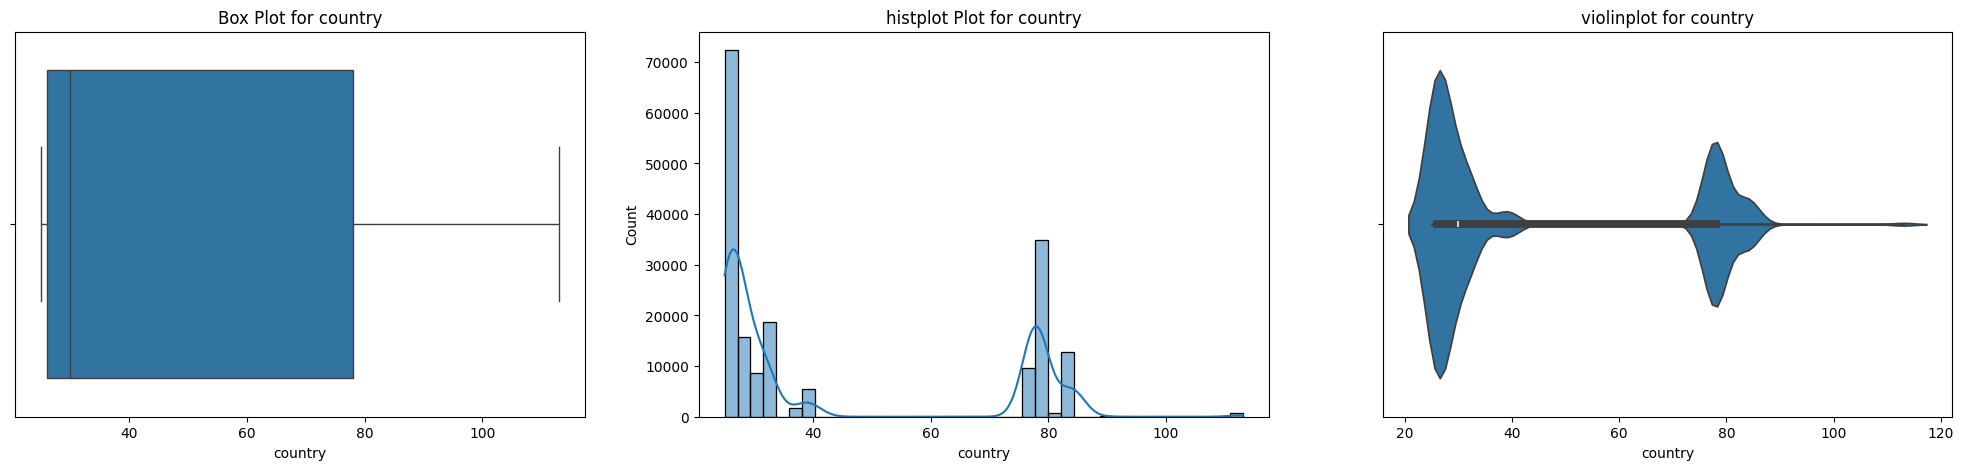

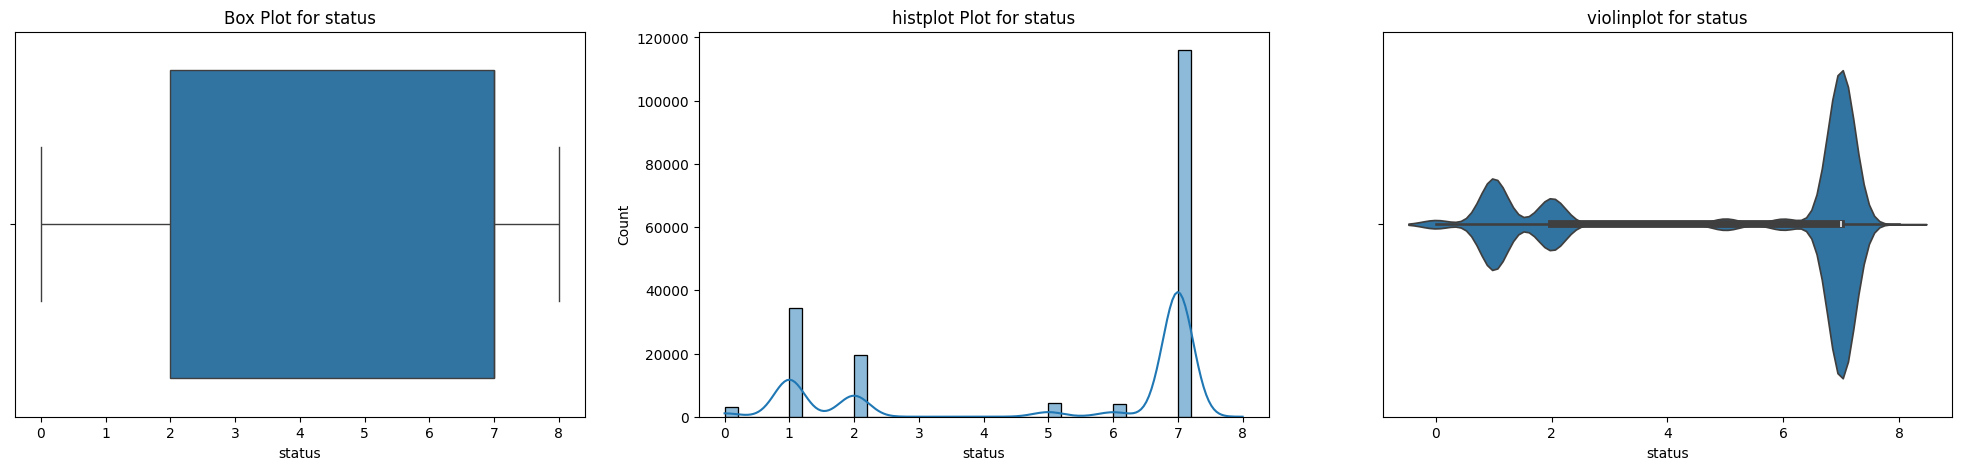

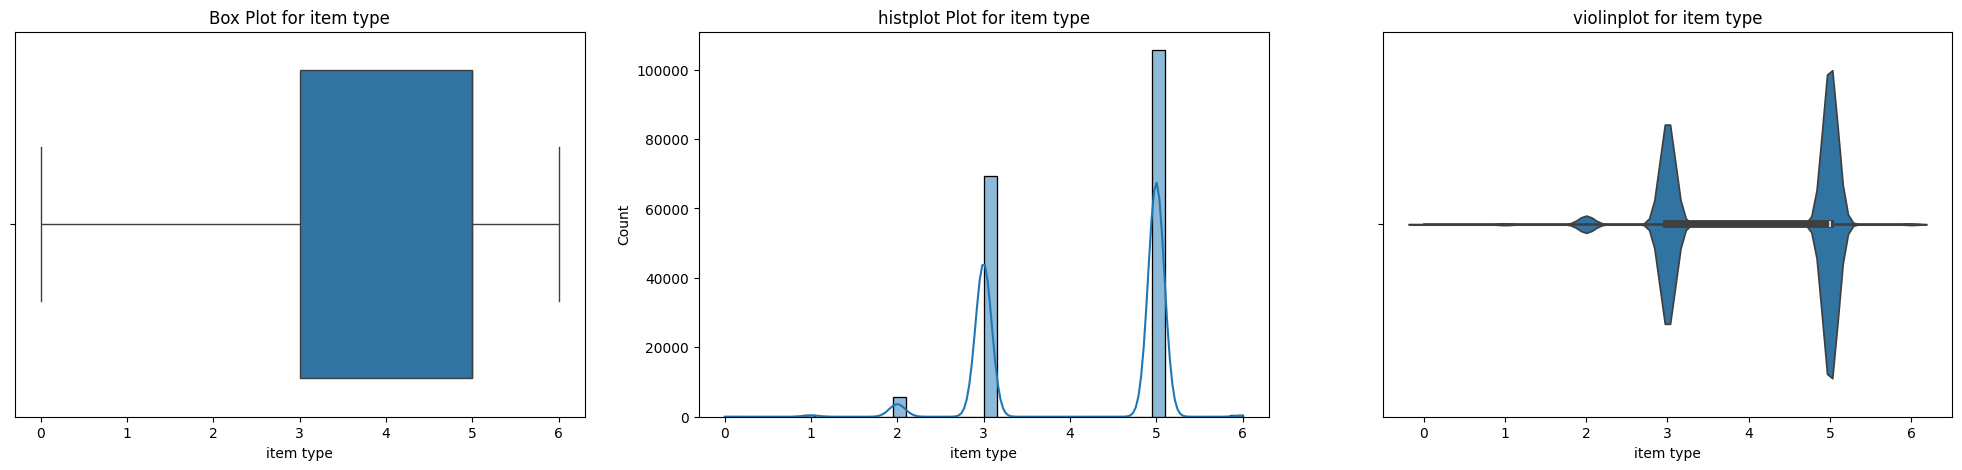

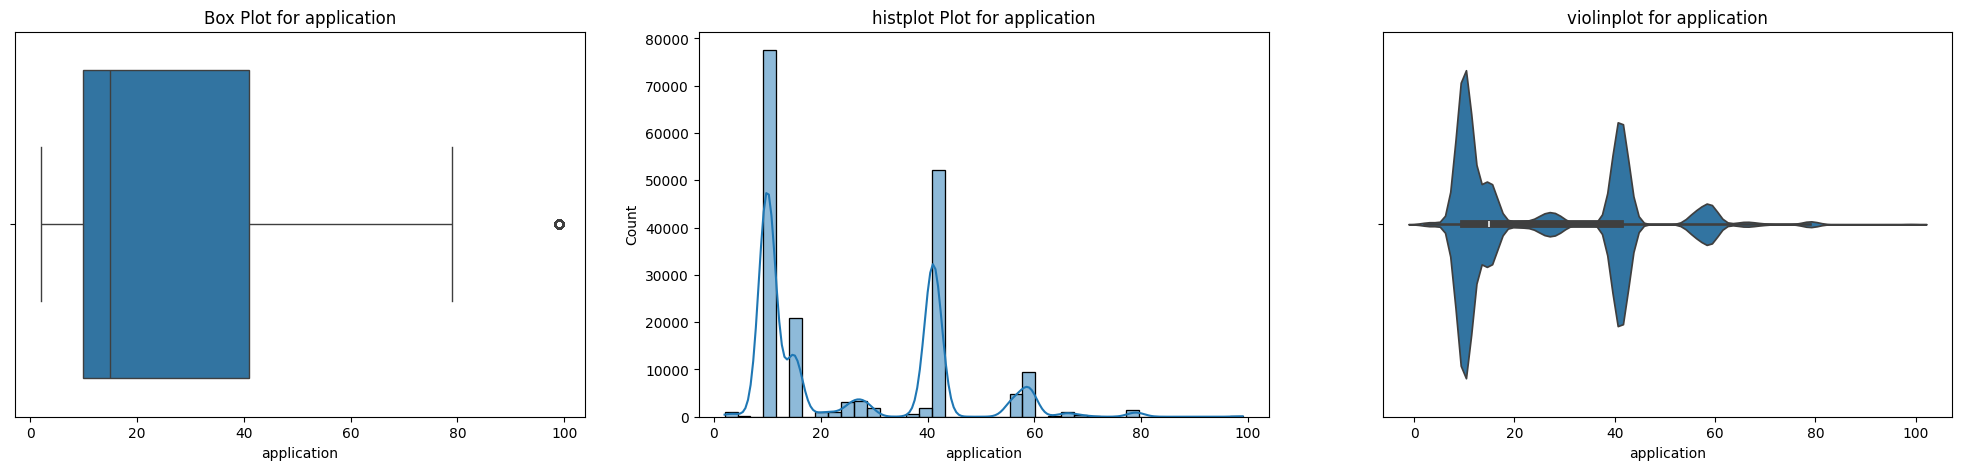

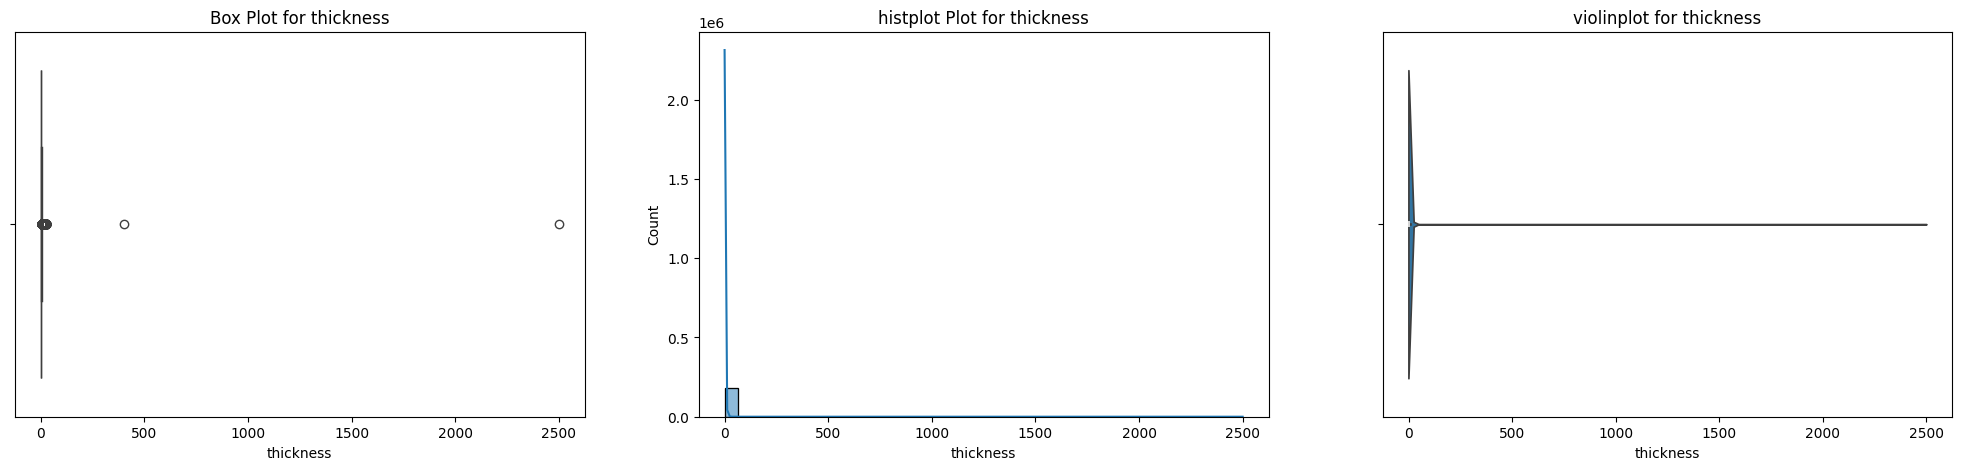

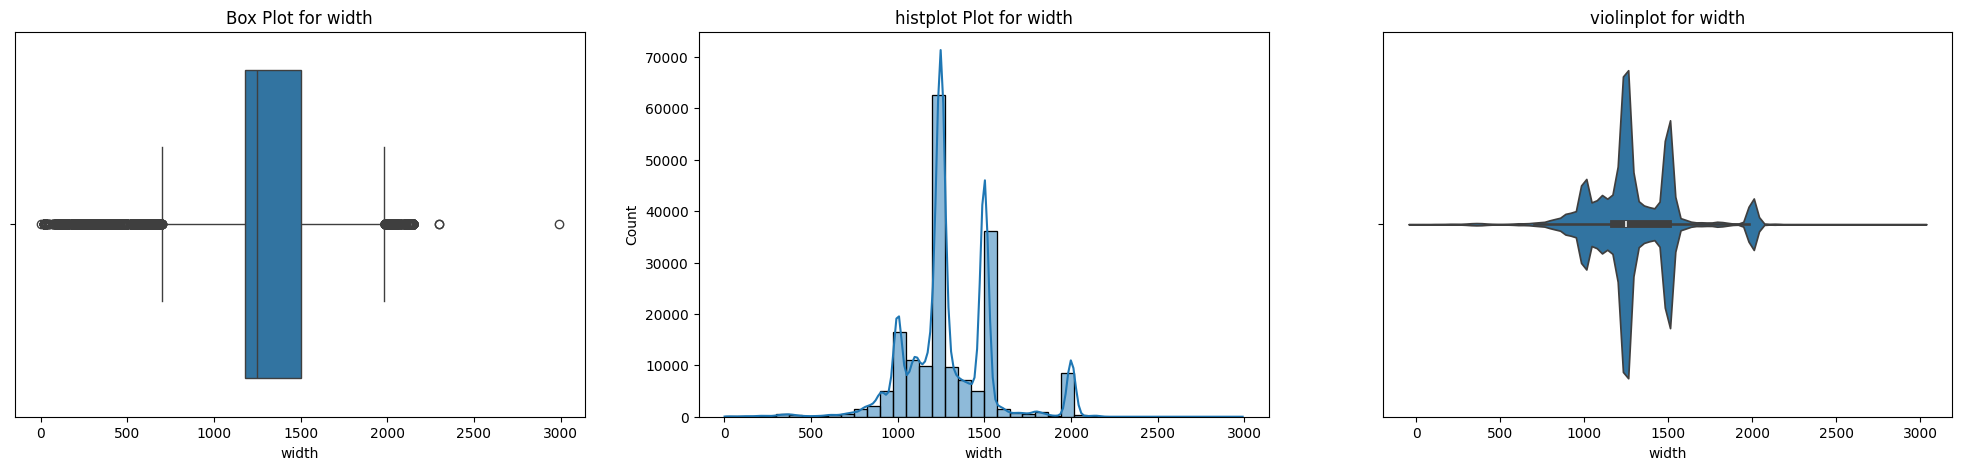

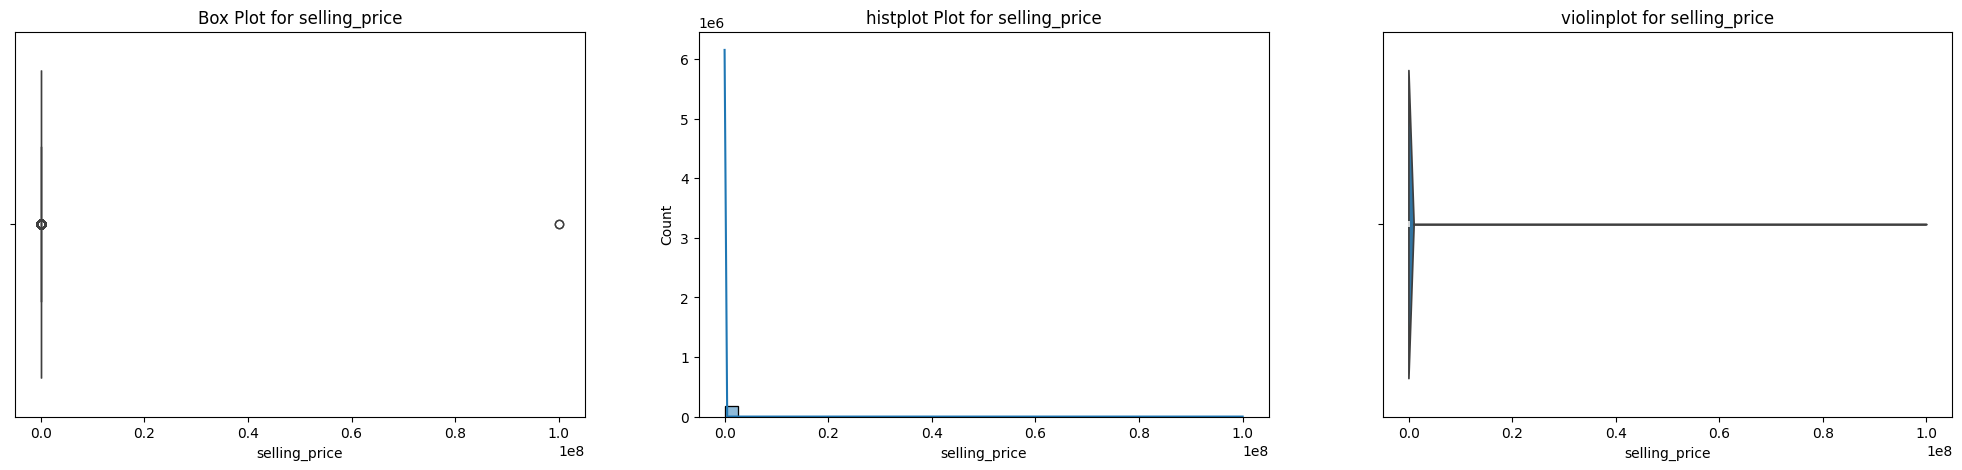

In [20]:
def skw(df,col):
    plt.figure(figsize=(25,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df,x=col)
    plt.title(f'Box Plot for {col}')

    plt.subplot(1,3,2)
    sns.histplot(data=df,x=col,kde=True,bins=40)
    plt.title(f'histplot Plot for {col}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df,x=col)
    plt.title(f'violinplot for {col}')
    plt.show()

    
col=['quantity tons', 'customer', 'country', 'status', 'item type','application', 'thickness', 'width','selling_price']

for i in col:
    skw(df1,i)


In [21]:
df1.isnull().sum()

id                      2
item_date               1
quantity tons           5
customer                0
country                 0
status                  0
item type               0
application             0
thickness               0
width                   0
material_ref       100645
product_ref             0
delivery date           0
selling_price           7
item_date_1             0
delivery date_1         0
delv_day                0
delv_month              0
delv_year               0
item_day                0
item_month              0
item_year               0
dtype: int64

In [22]:
df1['selling_price']=df1['selling_price'].fillna(df1['selling_price'].median())
df1['quantity tons']=df1['quantity tons'].fillna(df1['quantity tons'].median())

In [23]:
df1.describe()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,delv_day,delv_month,delv_year,item_day,item_month,item_year
count,1.816720e+05,1.816730e+05,1.816730e+05,181673.000000,181673.000000,181673.000000,181673.000000,181673.000000,181673.000000,1.816730e+05,1.816730e+05,1.816730e+05,181673,181673,181673.0,181673.000000,181673.000000,181673.000000,181673.000000,181673.000000
mean,2.020459e+07,5.874905e+03,3.051221e+07,44.893022,5.131847,4.133036,25.614406,2.564822,1295.286724,4.739679e+08,2.020738e+07,1.918076e+03,2020-11-26 22:57:02.470042624,2021-01-25 22:43:50.629757696,1.0,5.747701,2020.675021,15.112273,6.722925,2020.390223
min,1.995000e+07,1.000000e-05,1.245800e+04,25.000000,0.000000,0.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,1.000000e-01,2020-07-02 00:00:00,2019-04-01 00:00:00,1.0,1.000000,2019.000000,1.000000,1.000000,2020.000000
25%,2.020093e+07,1.097167e+01,3.019688e+07,26.000000,2.000000,3.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02,2020-09-29 00:00:00,2020-11-01 00:00:00,1.0,3.000000,2020.000000,8.000000,3.000000,2020.000000
50%,2.020113e+07,3.036501e+01,3.020524e+07,30.000000,7.000000,5.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02,2020-11-30 00:00:00,2021-01-01 00:00:00,1.0,6.000000,2021.000000,15.000000,8.000000,2020.000000
75%,2.021020e+07,6.716038e+01,3.028042e+07,78.000000,7.000000,5.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02,2021-02-03 00:00:00,2021-04-01 00:00:00,1.0,9.000000,2021.000000,23.000000,10.000000,2021.000000
max,2.021040e+07,1.000000e+09,2.147484e+09,113.000000,8.000000,6.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08,2021-04-01 00:00:00,2022-01-01 00:00:00,1.0,12.000000,2022.000000,31.000000,12.000000,2021.000000
std,4.551119e+03,2.349075e+06,2.433375e+07,24.402334,2.644839,1.055230,17.753421,6.572303,261.631754,7.175101e+08,2.411052e+04,3.317947e+05,NaN,NaN,0.0,3.426497,0.468498,8.765650,3.957360,0.487802


In [24]:
df1['quantity tons_log']=np.log(df1['quantity tons'])
df1['thickness_log']=np.log(df1['thickness'])
df1['width_log']=np.log(df1['width'])
df1['selling_price_log']=np.log(df1['selling_price'])


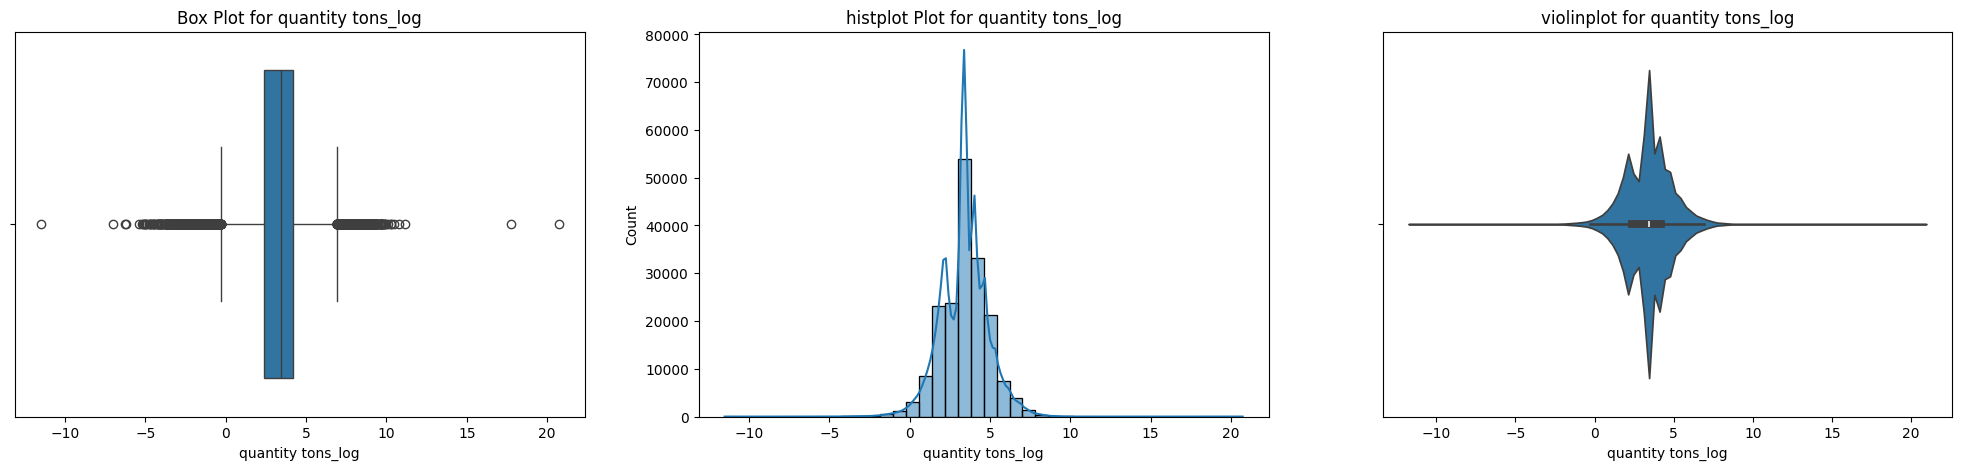

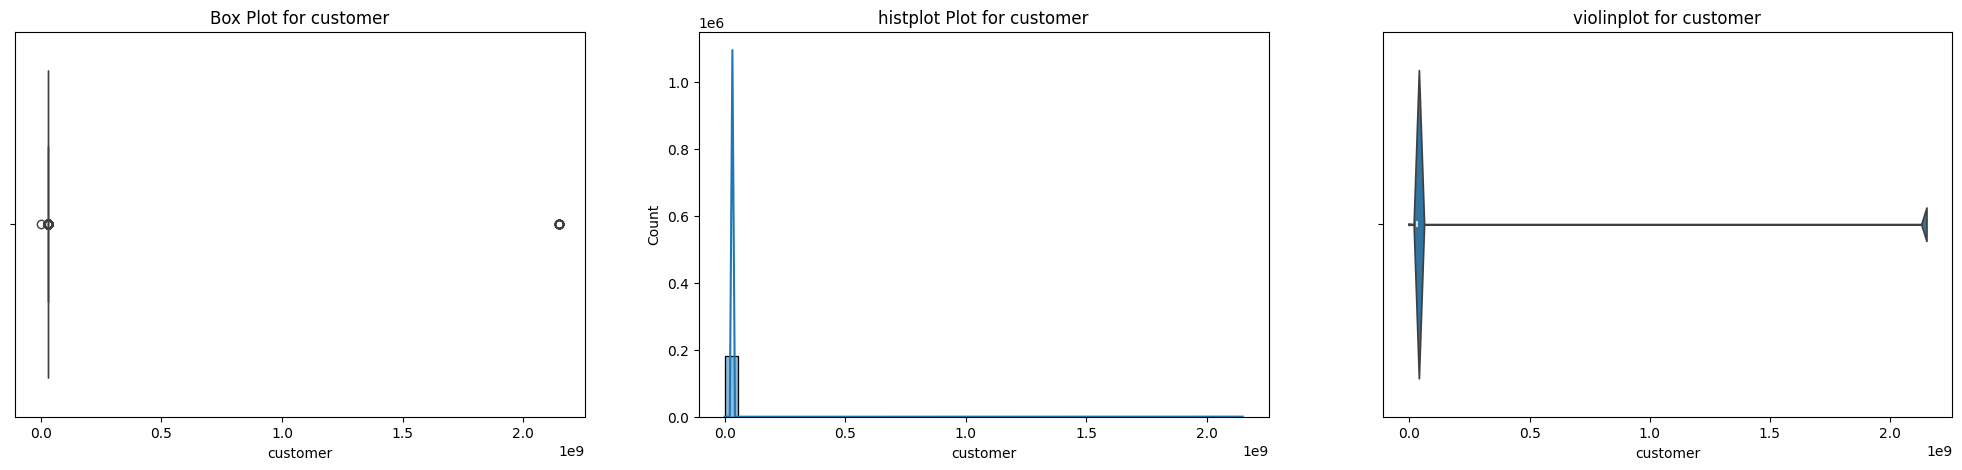

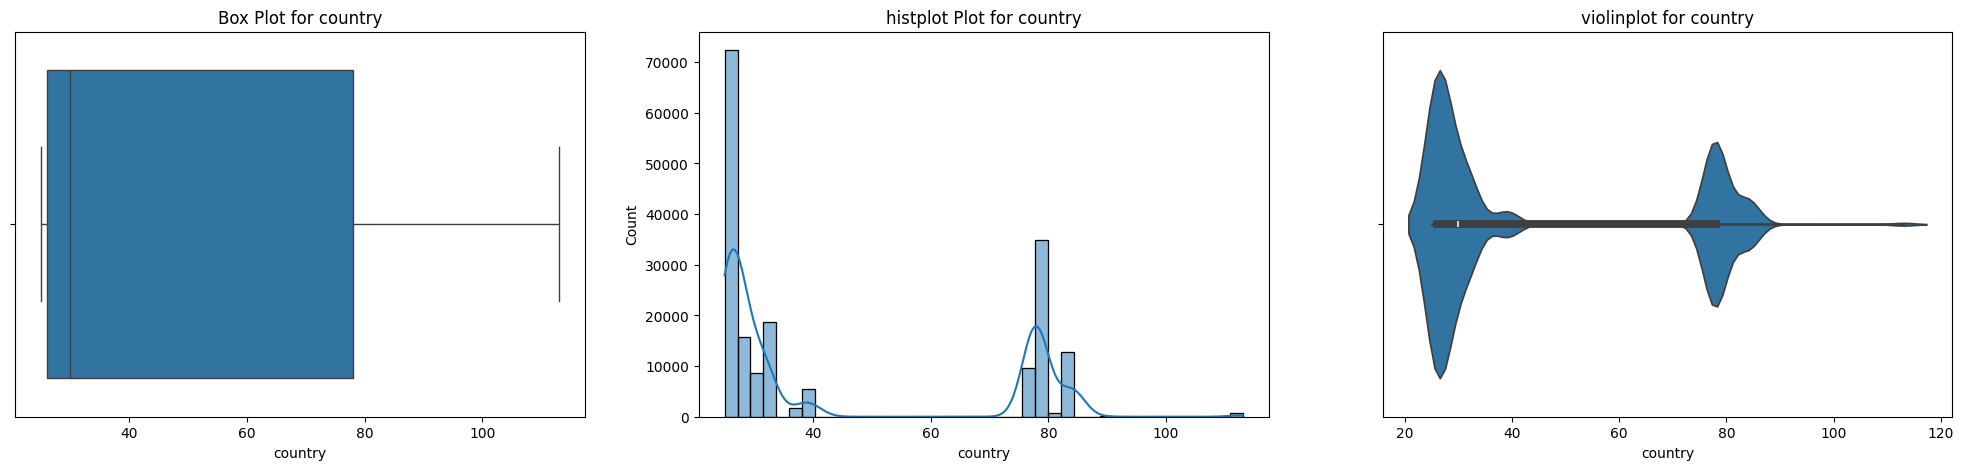

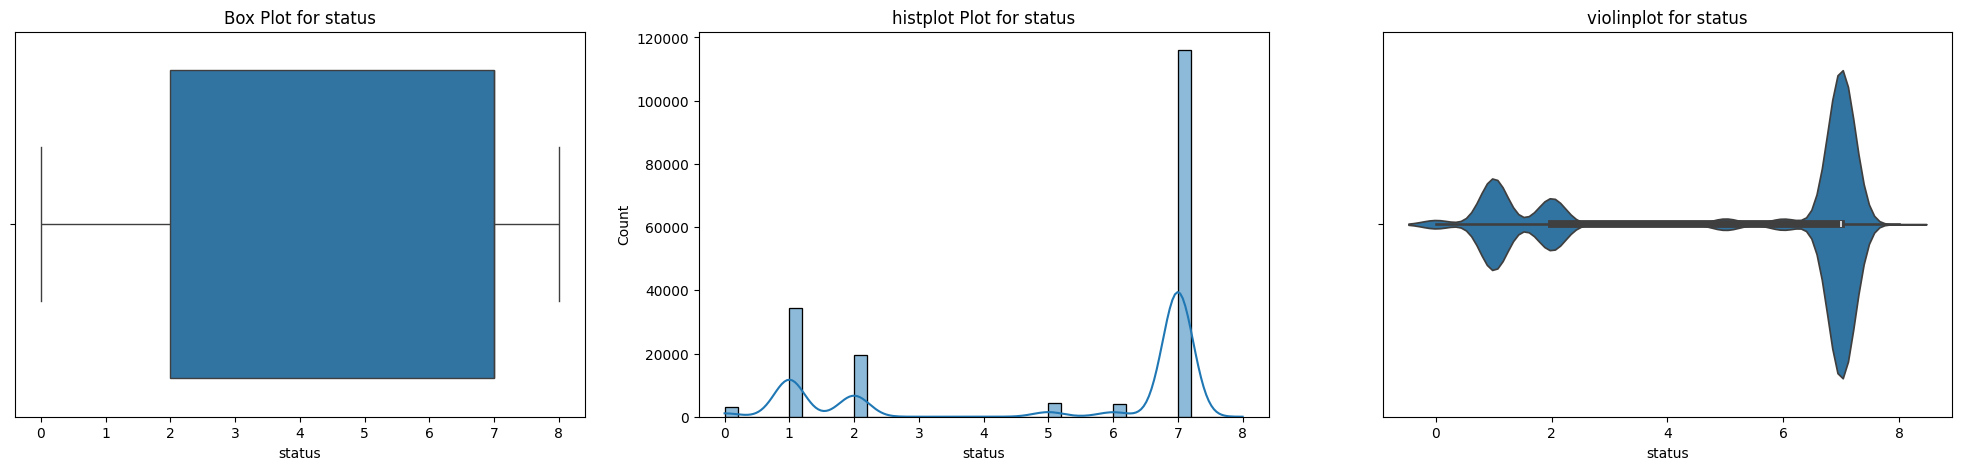

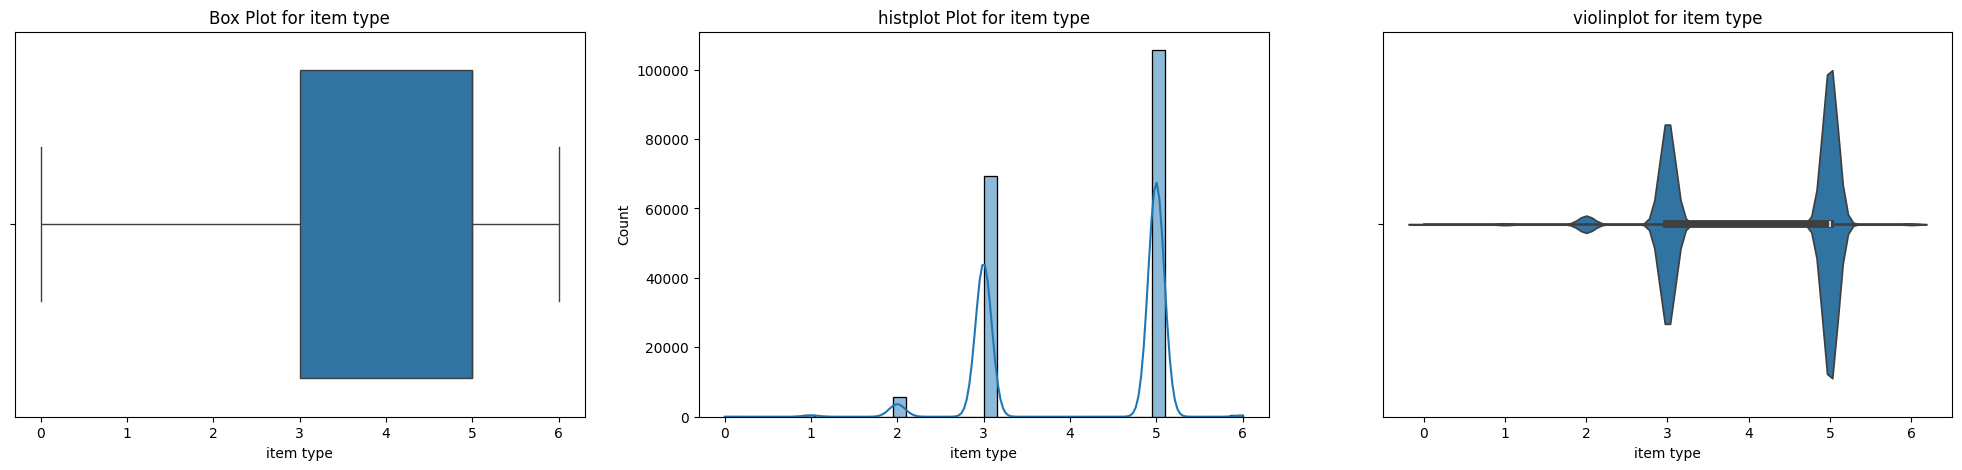

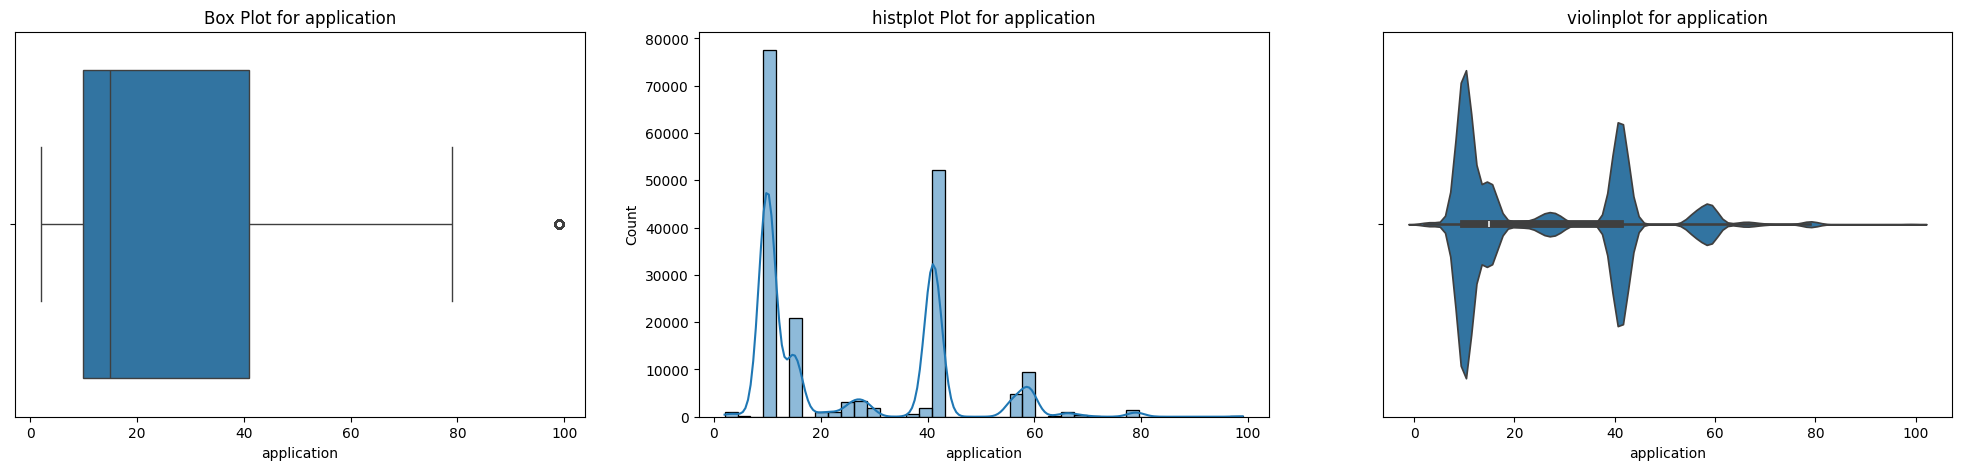

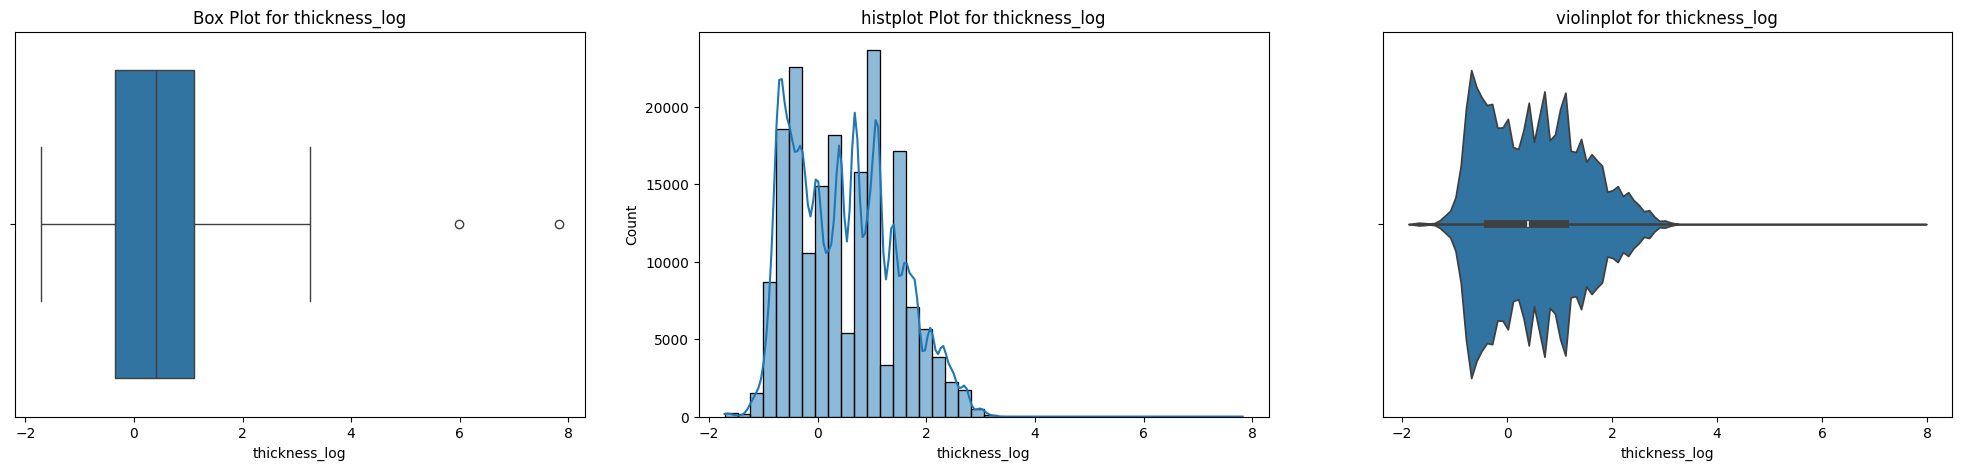

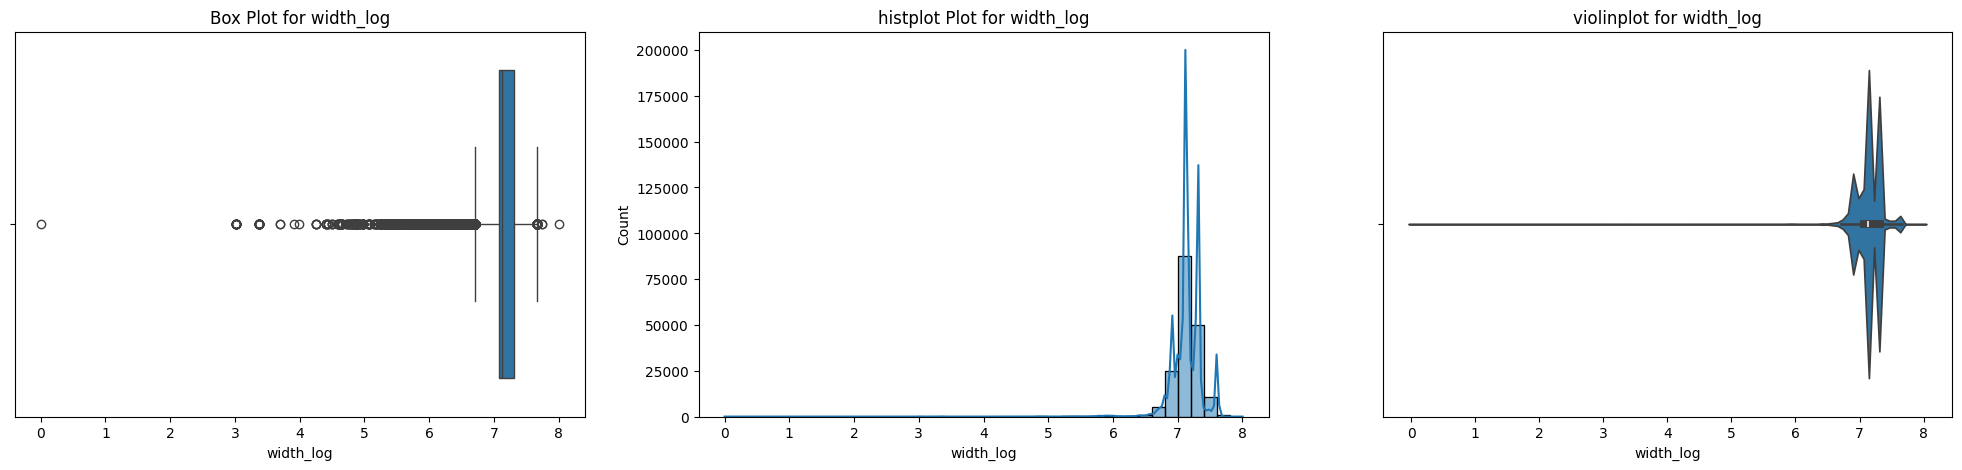

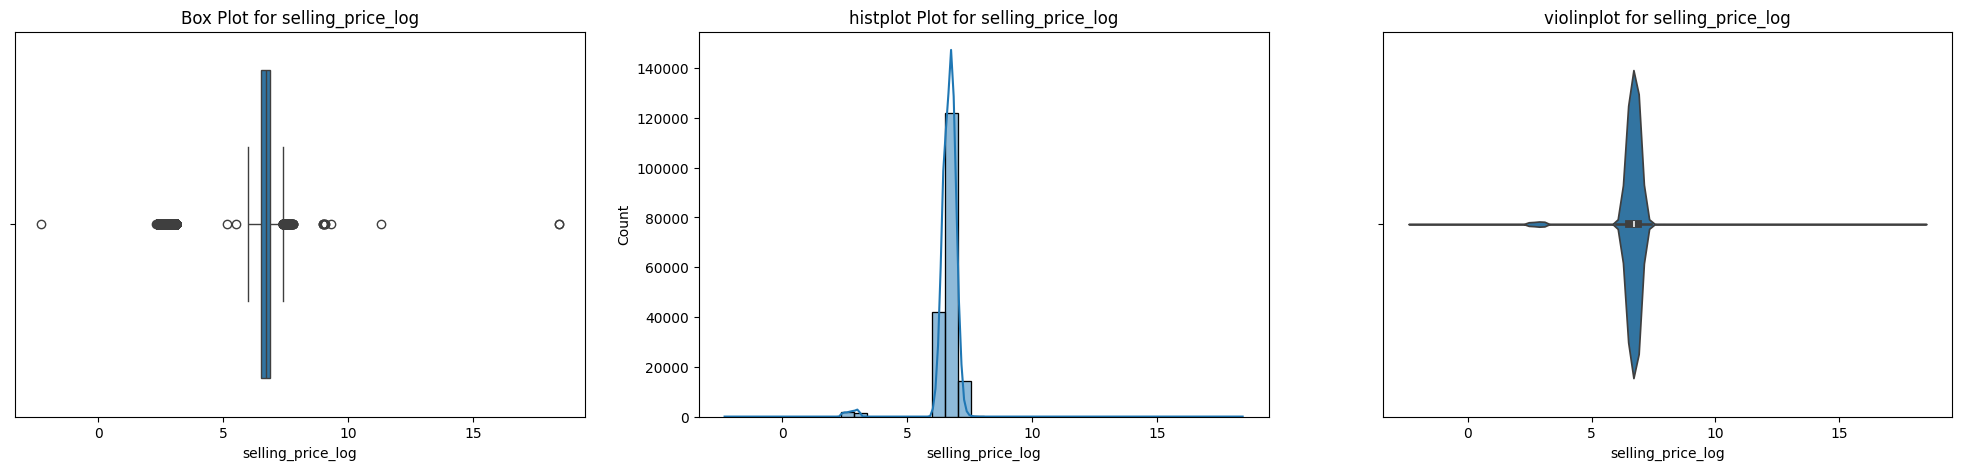

In [25]:
def trans_log(df,col):
    plt.figure(figsize=(25,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df,x=col)
    plt.title(f'Box Plot for {col}')

    plt.subplot(1,3,2)
    sns.histplot(data=df,x=col,kde=True,bins=40)
    plt.title(f'histplot Plot for {col}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df,x=col)
    plt.title(f'violinplot for {col}')
    plt.show()

    
col=['quantity tons_log', 'customer', 'country', 'status', 'item type','application', 'thickness_log', 'width_log','selling_price_log']

for i in col:
    trans_log(df1,i)

In [26]:
df1.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181672.0,20204588.226947,19950000.0,20200929.0,20201130.0,20210203.0,20210401.0,4551.119094
quantity tons,181673.0,5874.905389,0.00001,10.971669,30.365013,67.160385,1000000000.0,2349074.7765
customer,181673.0,30512207.3383,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333748.622752
country,181673.0,44.893022,25.0,26.0,30.0,78.0,113.0,24.402334
status,181673.0,5.131847,0.0,2.0,7.0,7.0,8.0,2.644839
item type,181673.0,4.133036,0.0,3.0,5.0,5.0,6.0,1.05523
application,181673.0,25.614406,2.0,10.0,15.0,41.0,99.0,17.753421
thickness,181673.0,2.564822,0.18,0.7,1.5,3.0,2500.0,6.572303
width,181673.0,1295.286724,1.0,1180.0,1250.0,1500.0,2990.0,261.631754
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402


In [27]:
df1['quantity tons_box'], best_lambda = boxcox(df1['quantity tons']) 
df1['thickness_box'],best_lambda= boxcox(df1['thickness'])
df1['width_box'],best_lambda= boxcox(df1['width'])
df1['selling_price_box'],best_lambda= boxcox(df1['selling_price'])

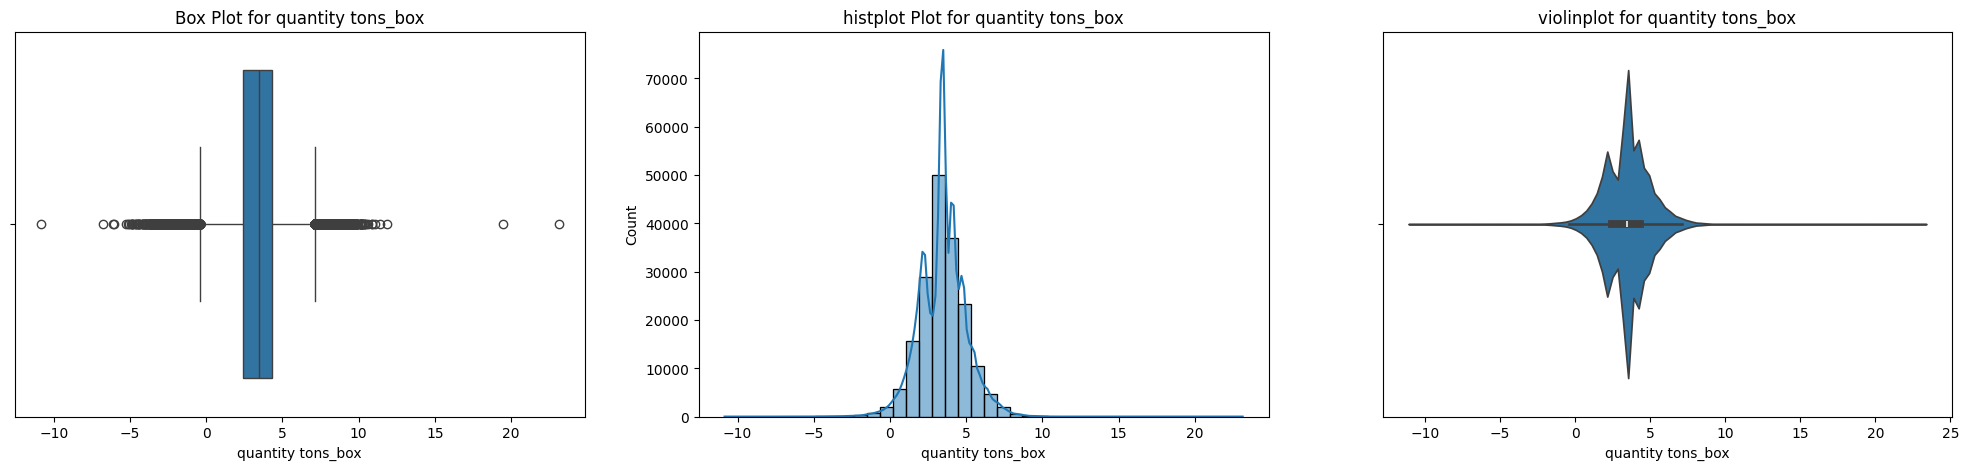

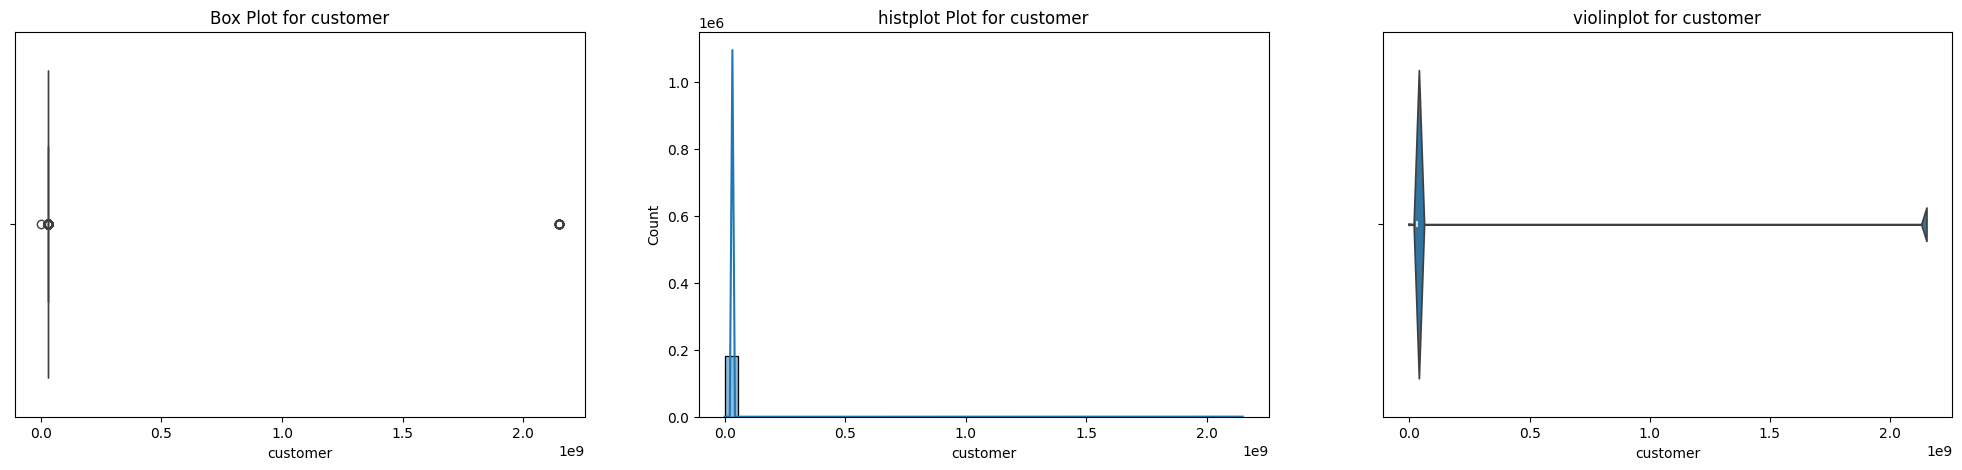

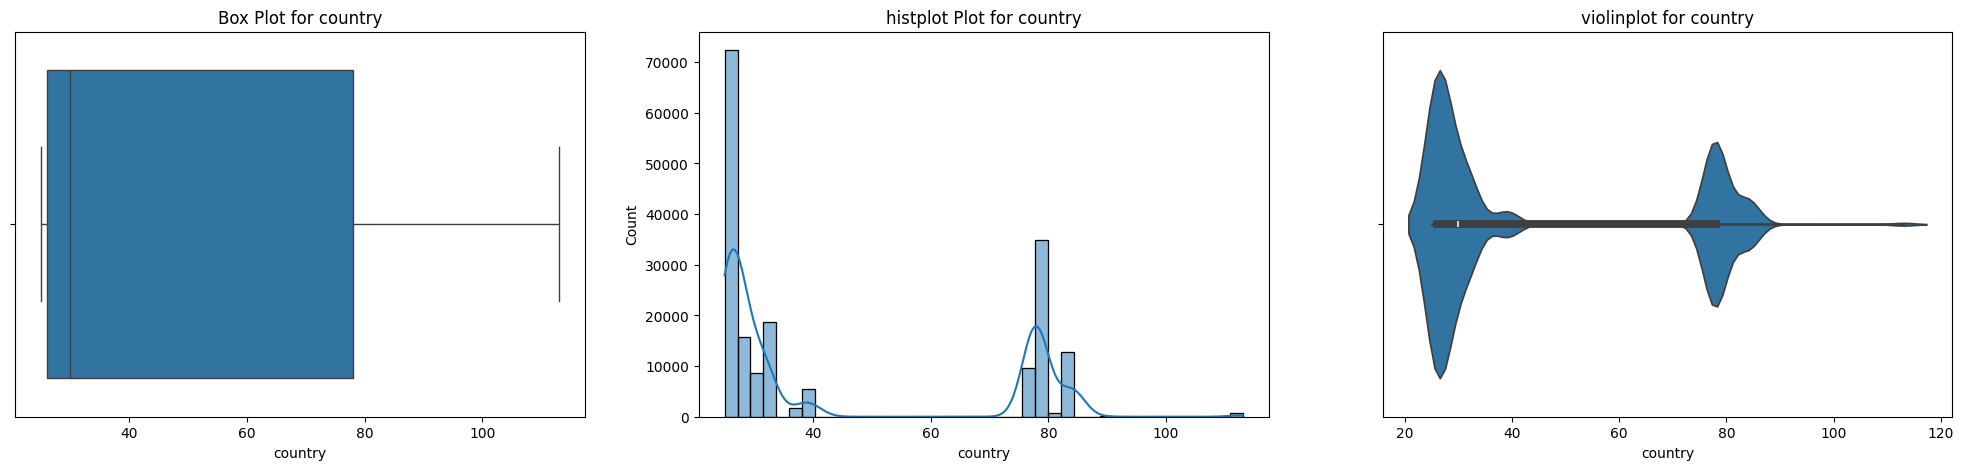

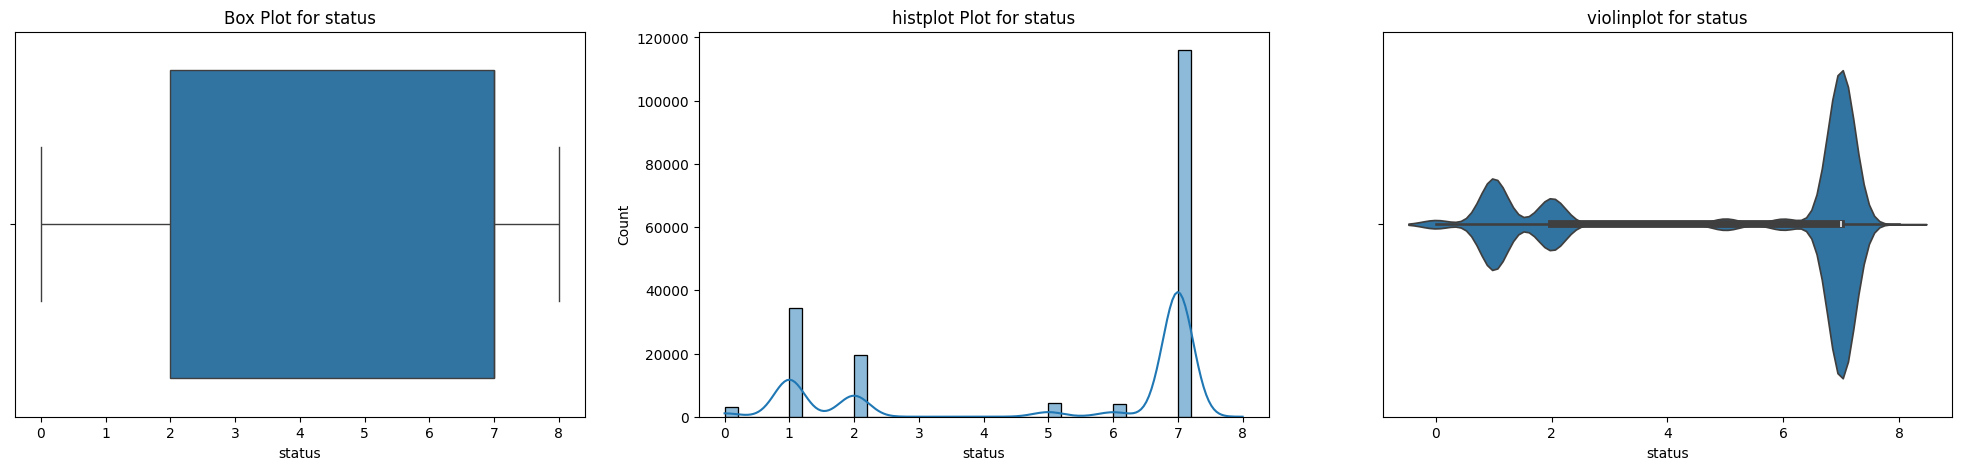

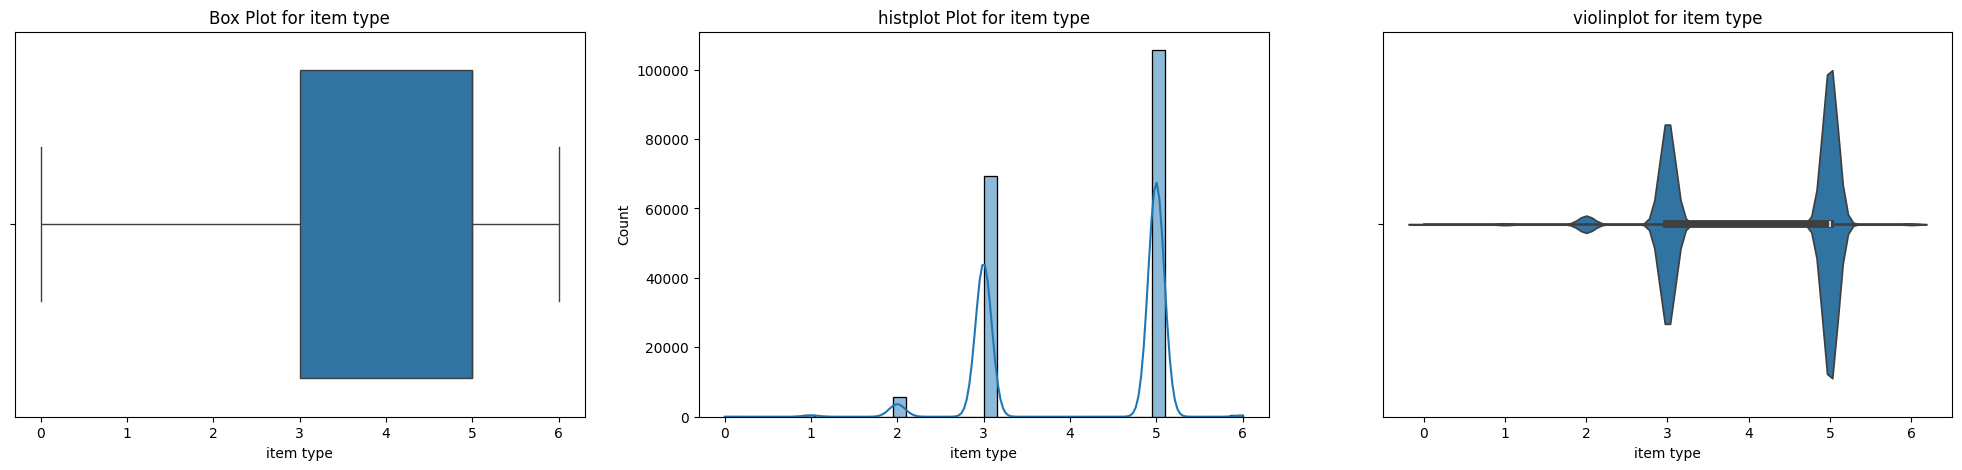

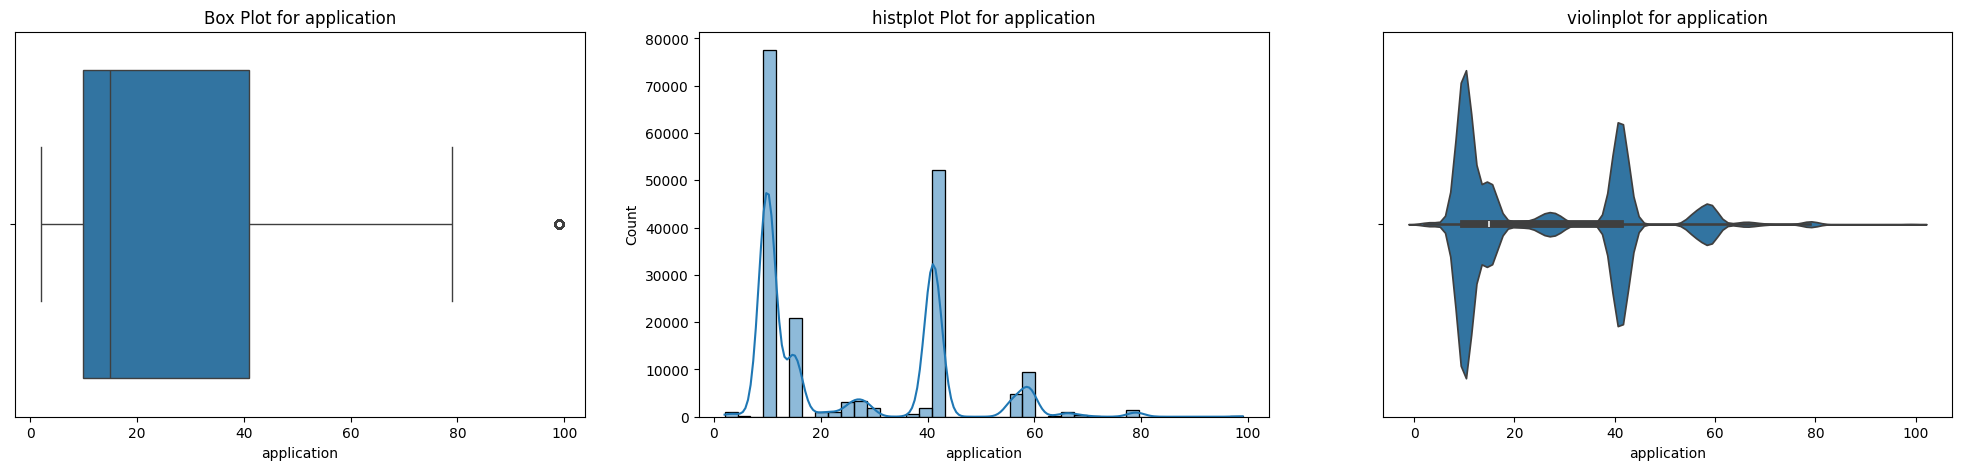

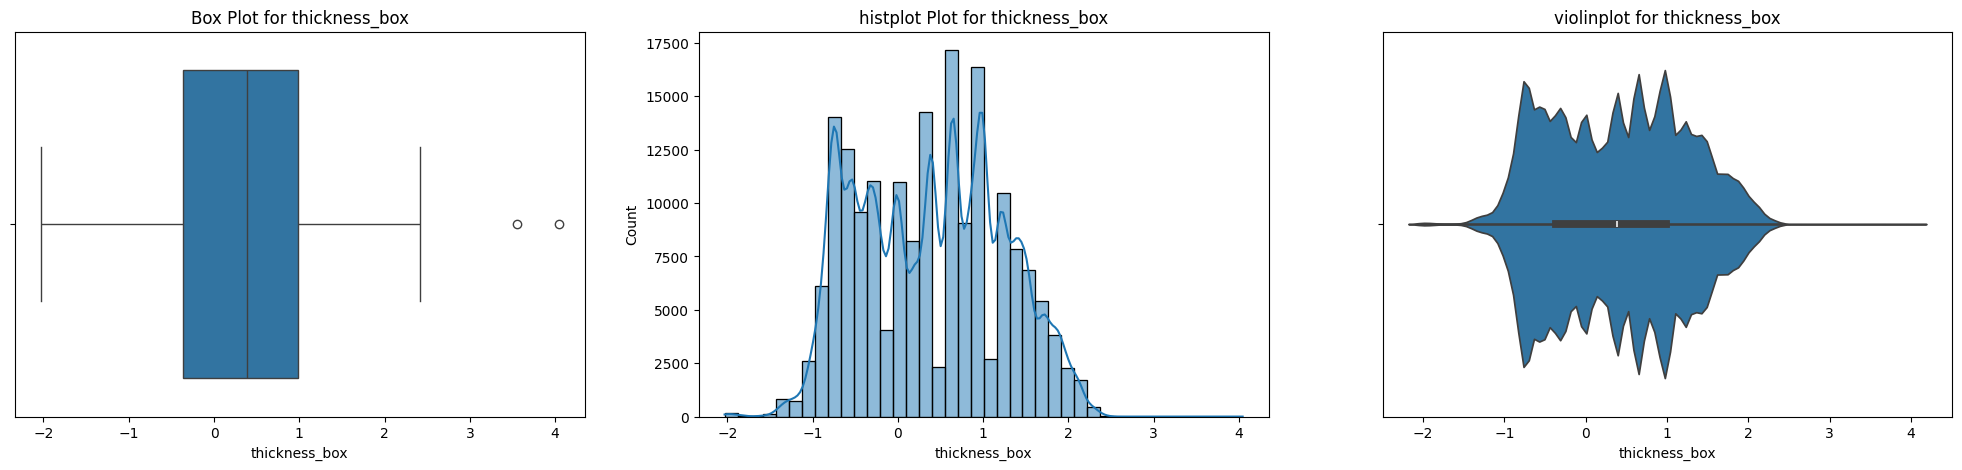

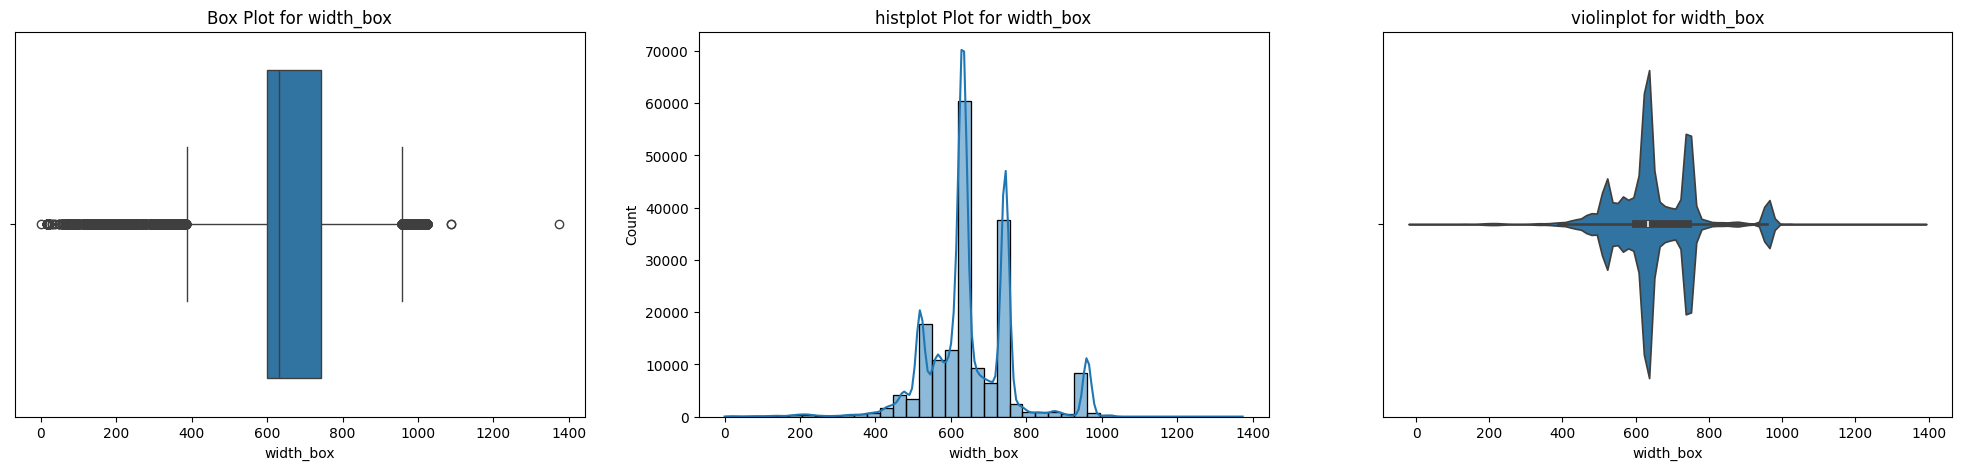

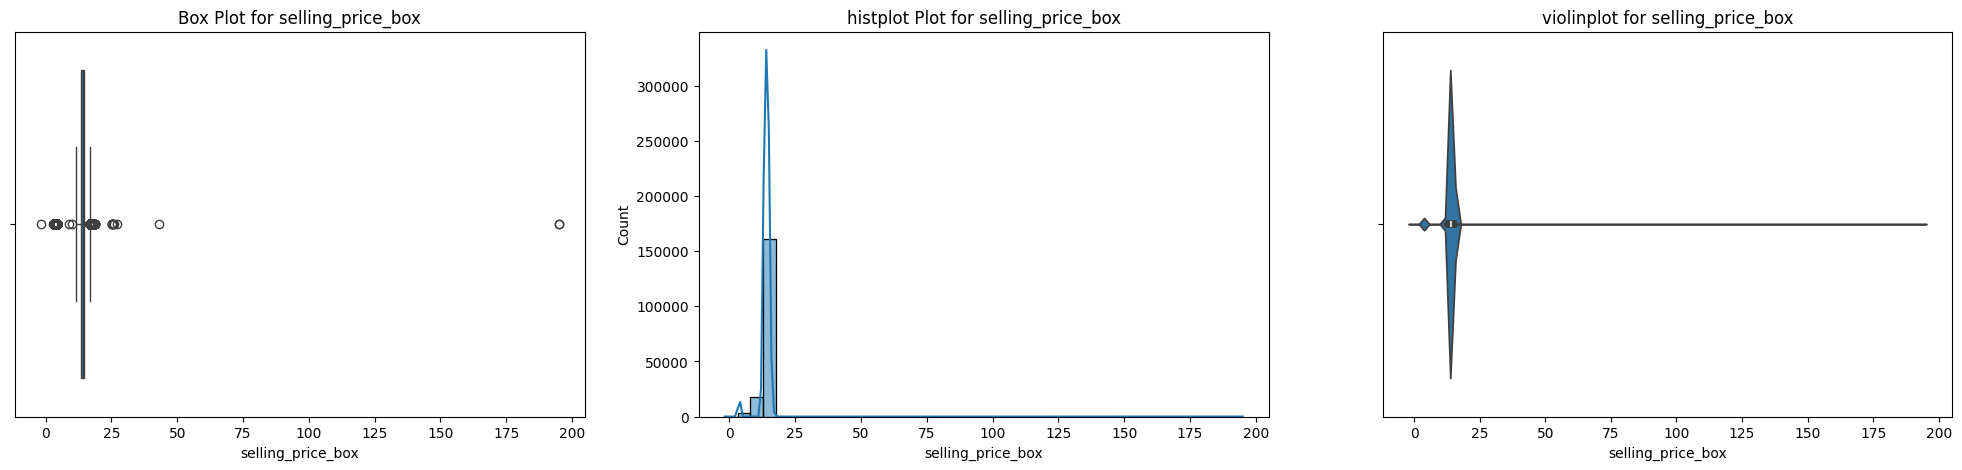

In [28]:
def trans_boxcox(df,col):
    plt.figure(figsize=(25,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df,x=col)
    plt.title(f'Box Plot for {col}')

    plt.subplot(1,3,2)
    sns.histplot(data=df,x=col,kde=True,bins=40)
    plt.title(f'histplot Plot for {col}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df,x=col)
    plt.title(f'violinplot for {col}')
    plt.show()

    
col=['quantity tons_box', 'customer', 'country', 'status', 'item type','application', 'thickness_box', 'width_box','selling_price_box']

for i in col:
    trans_boxcox(df1,i)
    

In [29]:
def iqrmeth(df,col):
    q3= df[col].quantile(0.75)
    q1= df[col].quantile(0.25)
    iqr=q3-q1
    upperbound=q3+(1.5*iqr)
    lowerbound=q1-(1.5*iqr)
    df[col]=np.where(df[col]>upperbound,upperbound,np.where(df[col]<lowerbound,lowerbound,df[col]))  



col=['quantity tons_log', 'thickness_log', 'width_log', 'selling_price_log']
col1=['quantity tons_box', 'thickness_box', 'width_box', 'selling_price_box']
for i in col:
     iqrmeth(df1,i)
for i in col1:
     iqrmeth(df1,i)


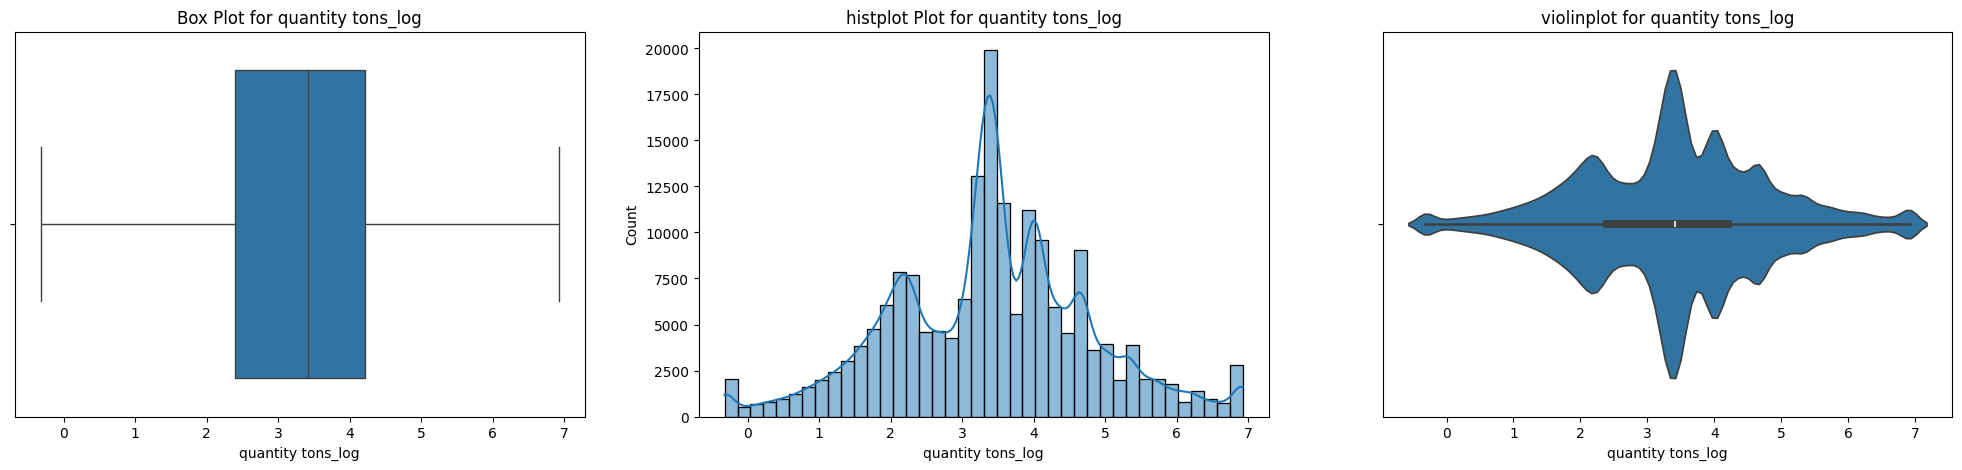

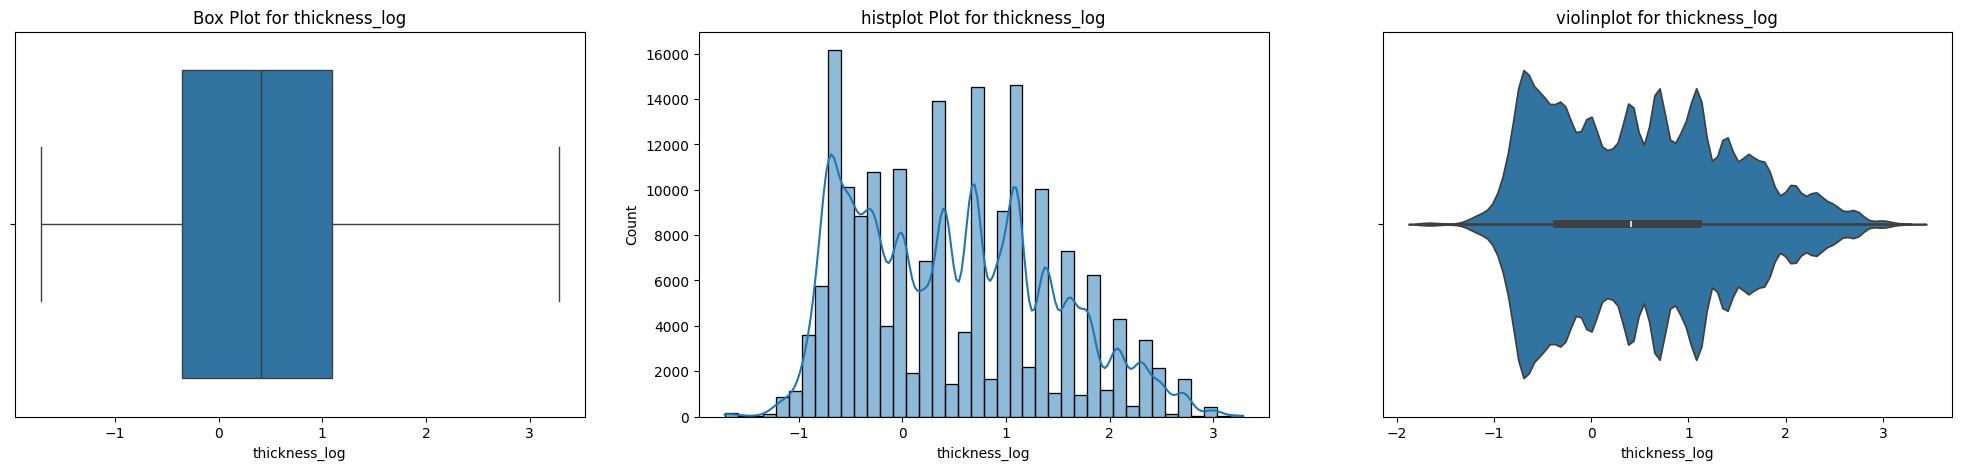

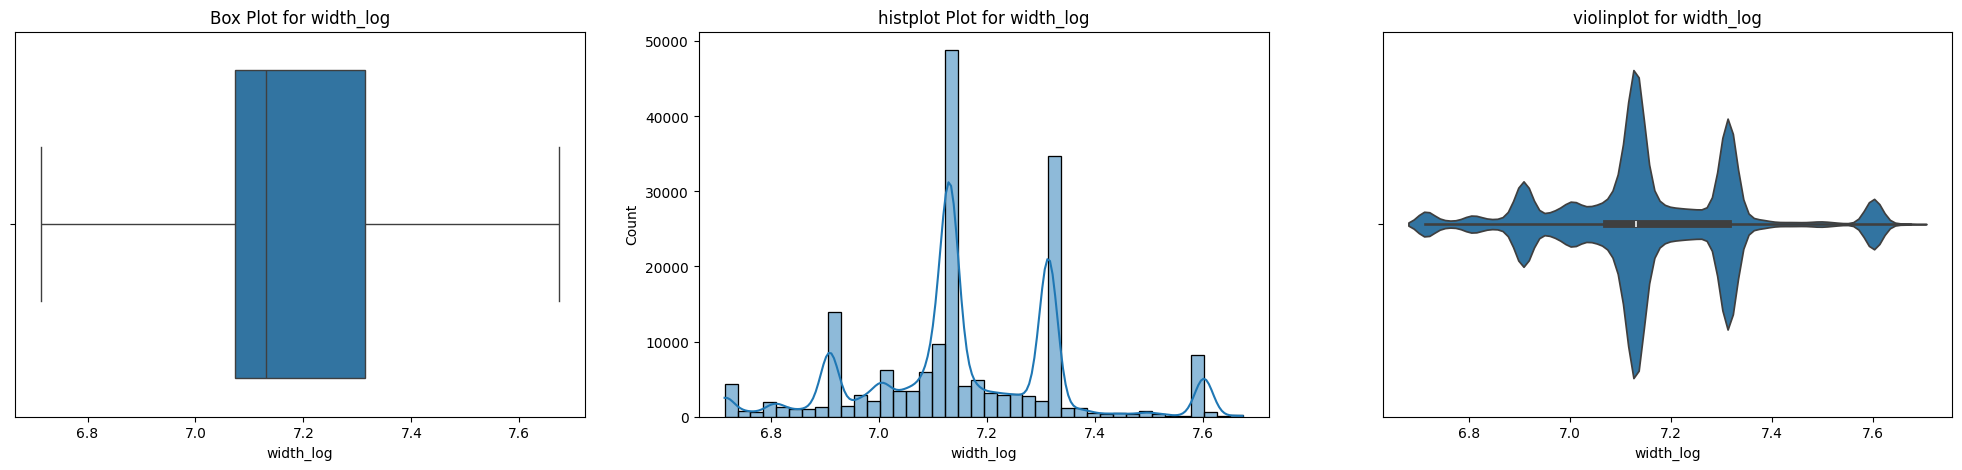

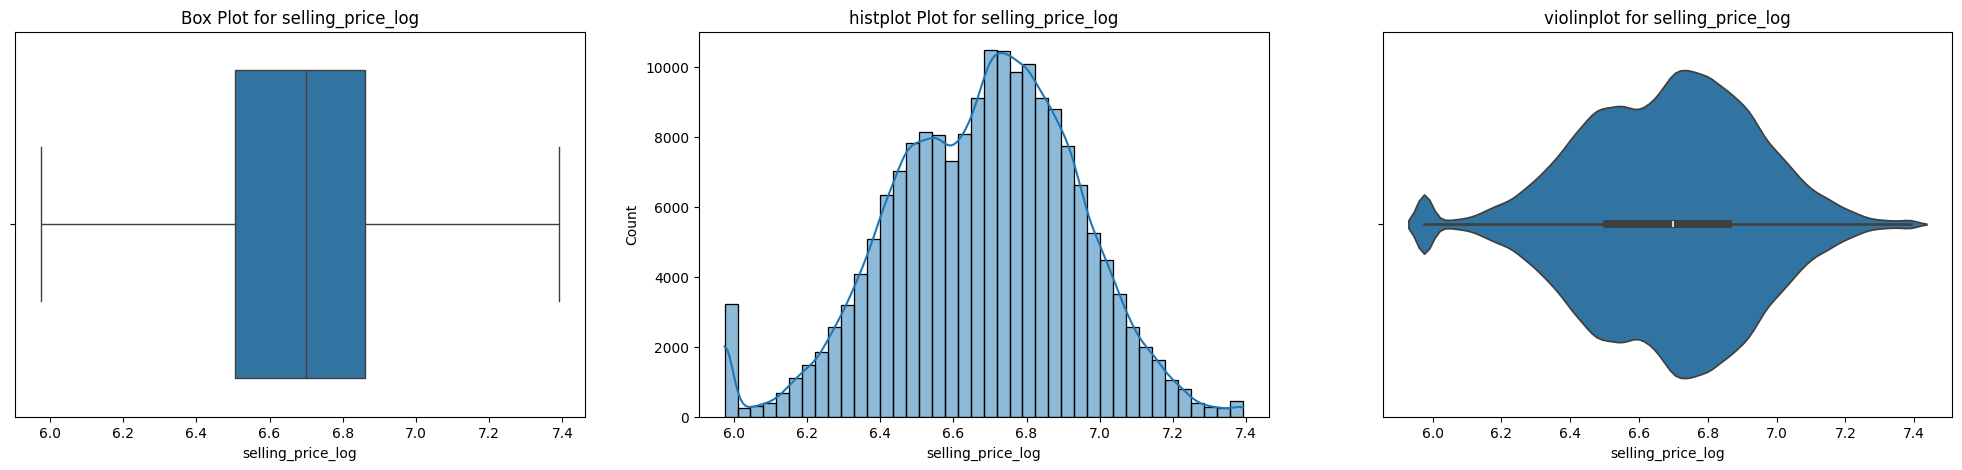

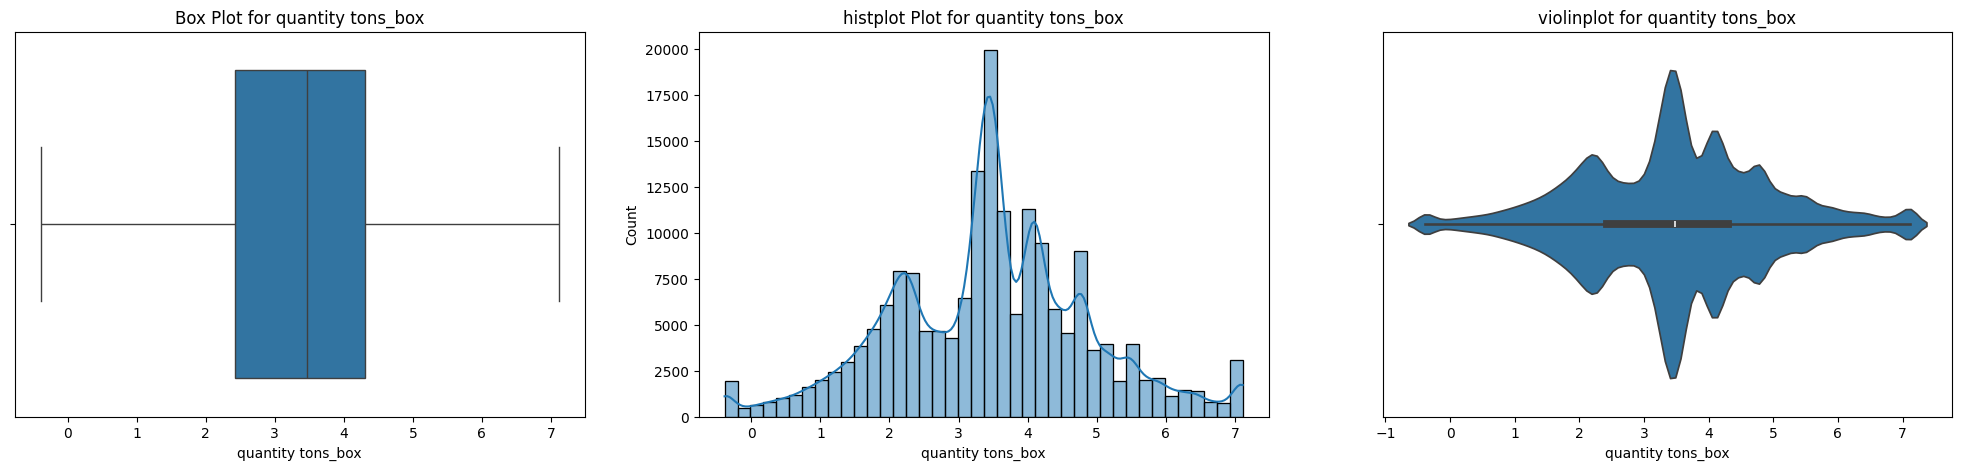

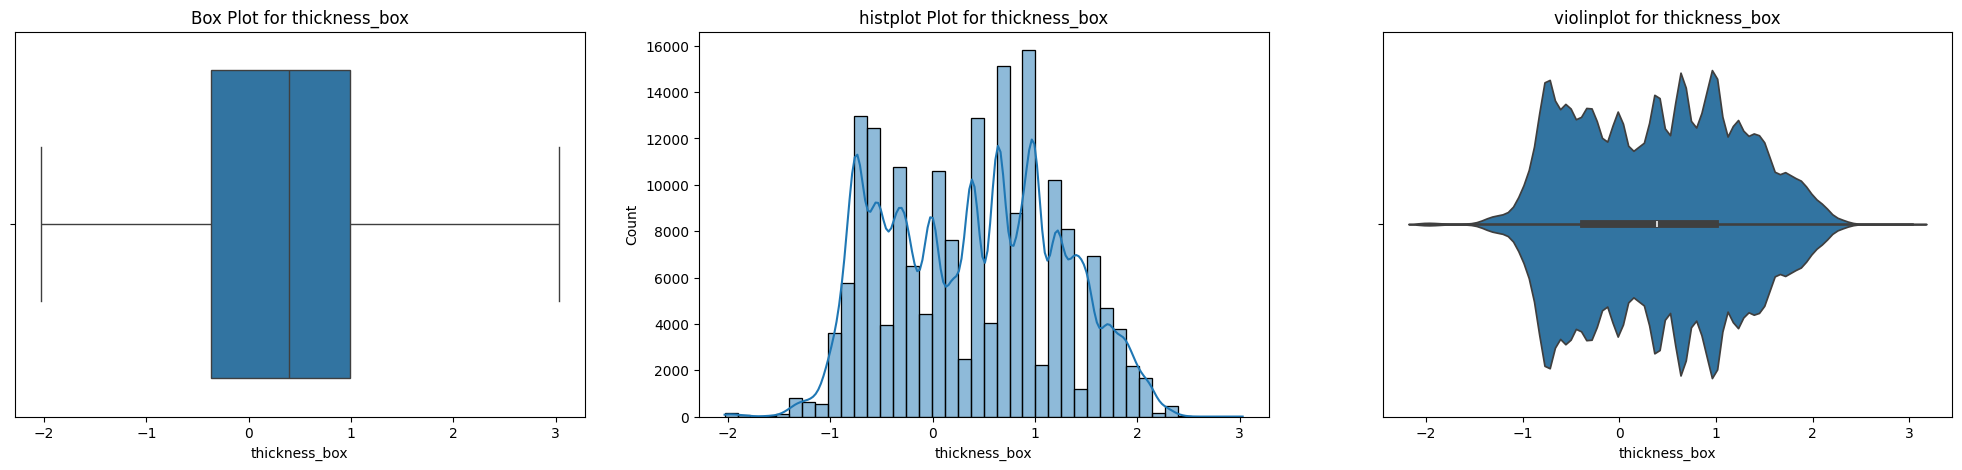

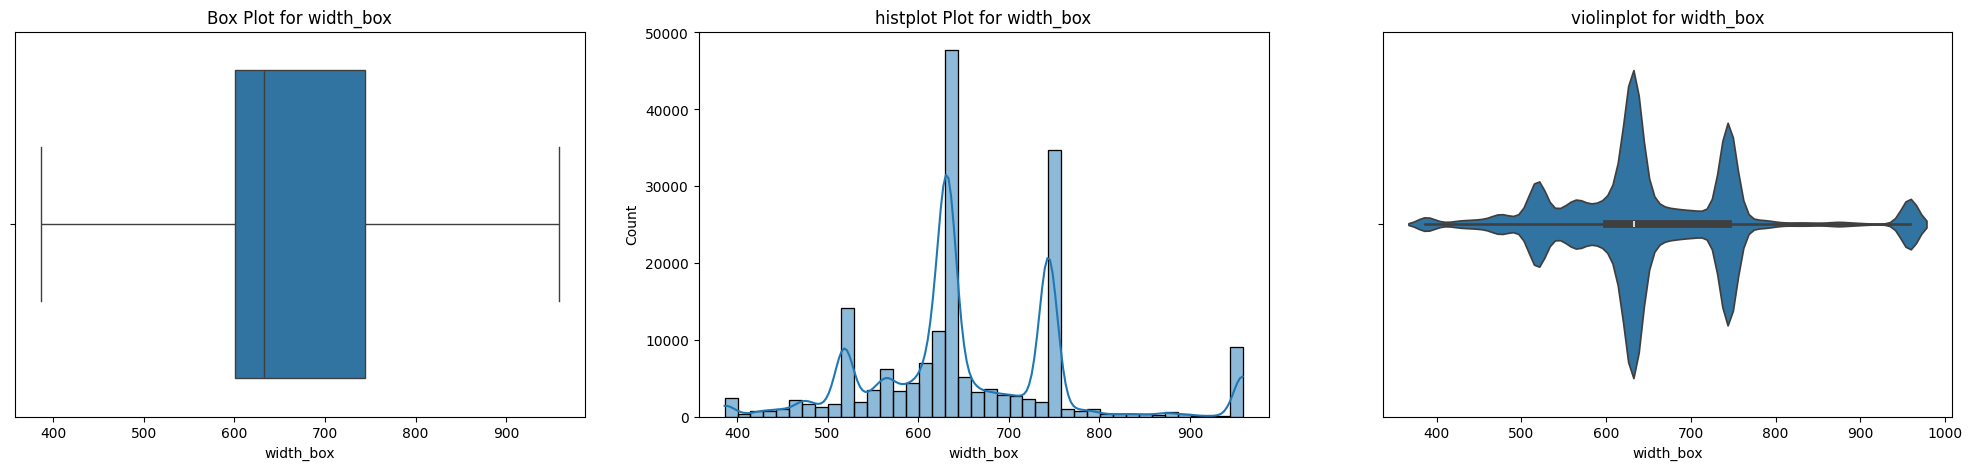

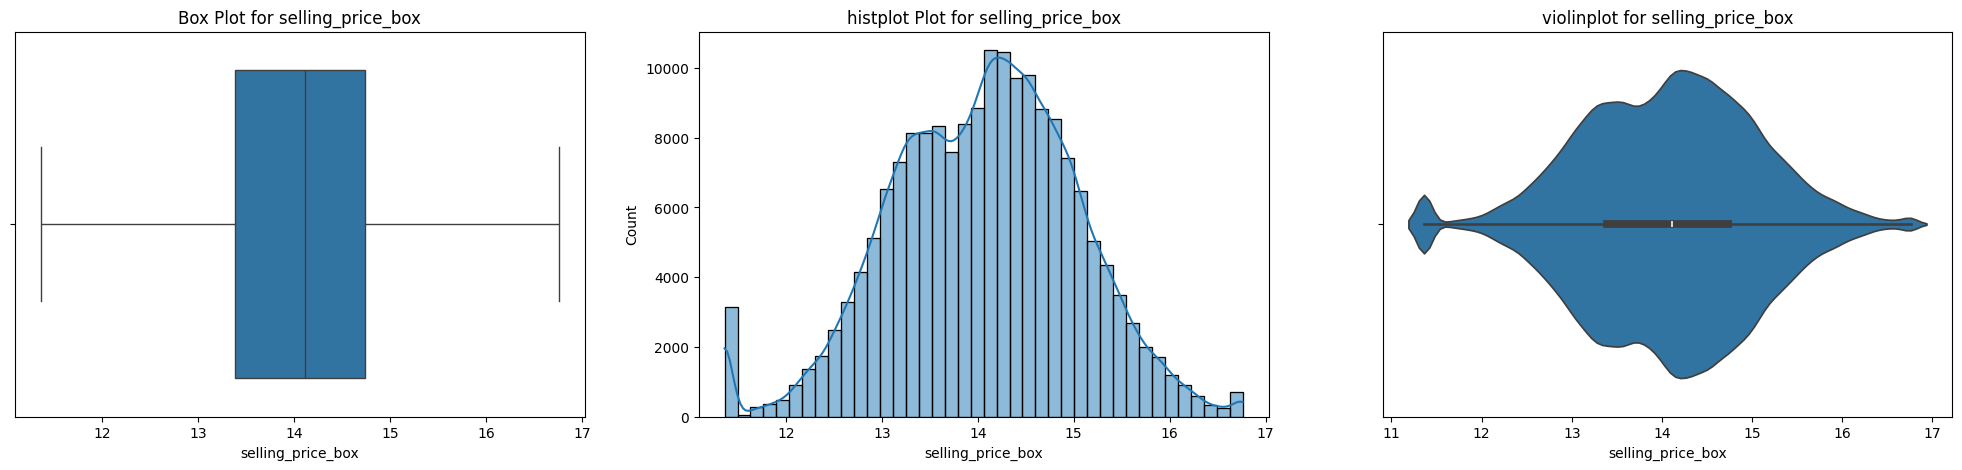

In [30]:
col=['quantity tons_log', 'thickness_log', 'width_log', 'selling_price_log']
col1=['quantity tons_box', 'thickness_box', 'width_box', 'selling_price_box']
for i in col:
    skw(df1,i)
for i in col1:
    skw(df1,i)


In [31]:
col_heat_log=['customer','country','application','quantity tons_log', 'thickness_log', 'width_log', 'selling_price_log']
col_heat_box=['customer','country','application','quantity tons_box', 'thickness_box', 'width_box', 'selling_price_box']



In [32]:
df_heat_log=df1[col_heat_log].corr()
df_heat1_box=df1[col_heat_box].corr()

<Axes: >

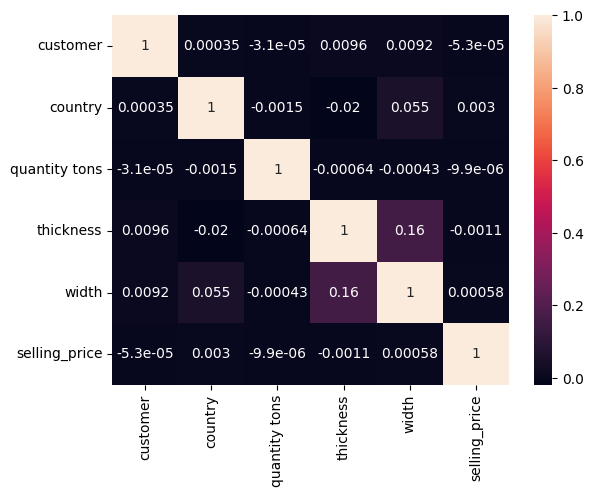

In [33]:
col_bfr=['customer','country','quantity tons', 'thickness', 'width', 'selling_price']
df_bfr=df1[col_bfr].corr()
sns.heatmap(df_bfr,annot=True)

<Axes: >

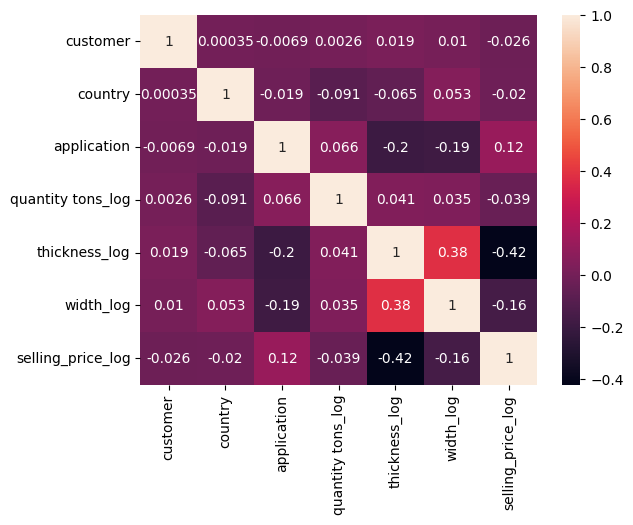

In [34]:
sns.heatmap(df_heat_log,annot=True)

<Axes: >

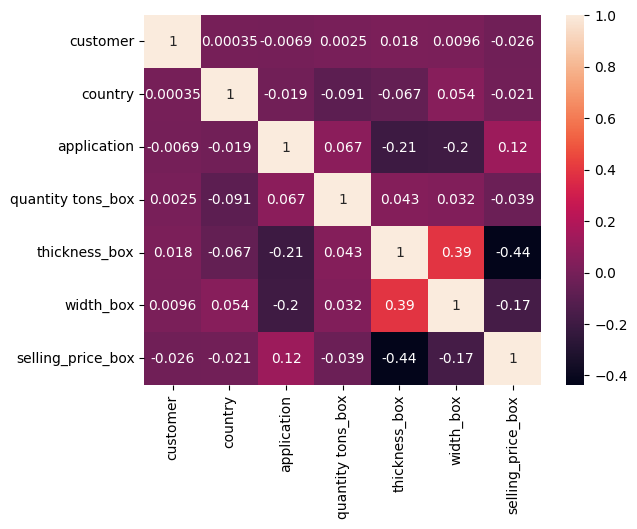

In [35]:
sns.heatmap(df_heat1_box,annot=True)

In [36]:
df1['diff_dvdate']=(df1['delivery date_1']-df1['item_date_1']).dt.days

In [37]:
df1[['delivery date_1','item_date_1','diff_dvdate']]

,delivery date_1,item_date_1,diff_dvdate
0,2021-07-01,2021-04-01,91
1,2021-04-01,2021-04-01,0
2,2021-01-01,2021-04-01,-90
3,2021-01-01,2021-04-01,-90
4,2021-03-01,2021-04-01,-31
...,...,...,...
181668,2020-07-01,2020-07-02,-1
181669,2020-07-01,2020-07-02,-1
181670,2020-07-01,2020-07-02,-1
181671,2020-07-01,2020-07-02,-1


In [38]:
df_clean_data=df1.query('diff_dvdate>0')

In [39]:
df_clean_data.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'item_date_1',
       'delivery date_1', 'delv_day', 'delv_month', 'delv_year', 'item_day',
       'item_month', 'item_year', 'quantity tons_log', 'thickness_log',
       'width_log', 'selling_price_log', 'quantity tons_box', 'thickness_box',
       'width_box', 'selling_price_box', 'diff_dvdate'],
      dtype='object')

In [40]:
df_clean_data.drop(columns=['id','delivery date', 'selling_price','delv_day', 'delv_month', 'delv_year', 'item_day',
       'item_month', 'item_year'],inplace=True)

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_20532\1977160926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_data.drop(columns=['id','delivery date', 'selling_price','delv_day', 'delv_month', 'delv_year', 'item_day',


In [41]:
df_clean_data.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,165104.0,20204803.117665,19950000.0,20201005.0,20201203.0,20210209.0,20210401.0,4588.550261
quantity tons,165105.0,6150.904589,0.00001,11.349334,30.520674,66.90152,1000000000.0,2461046.68777
customer,165105.0,30541119.671312,12458.0,30196886.0,30205312.0,30280961.0,2147483647.0,25525307.814337
country,165105.0,45.319978,25.0,26.0,30.0,78.0,113.0,24.530501
status,165105.0,5.011114,0.0,2.0,7.0,7.0,8.0,2.683656
item type,165105.0,4.120414,0.0,3.0,5.0,5.0,6.0,1.050305
application,165105.0,24.95799,2.0,10.0,15.0,41.0,99.0,17.636904
thickness,165105.0,2.607829,0.18,0.74,1.5,3.0,400.0,3.021884
width,165105.0,1300.943353,1.0,1180.0,1250.0,1500.0,2990.0,262.068781
product_ref,165105.0,480997724.732467,611728.0,628377.0,640665.0,1332077137.0,1722207579.0,720313320.108089


In [42]:
df_clean_data.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,...,delivery date_1,quantity tons_log,thickness_log,width_log,selling_price_log,quantity tons_box,thickness_box,width_box,selling_price_box,diff_dvdate
0,20210401.0,54.151139,30156308.0,28.0,7,5.0,10.0,2.00,1500.0,DEQ1 S460MC,...,2021-07-01,3.991779,0.693147,7.313220,6.749931,4.076120,0.648896,743.747469,14.307094,91
6,20210401.0,3.522613,30209509.0,30.0,0,5.0,41.0,0.38,1125.0,NBW_L+_A_1125_0.4,...,2021-07-01,1.259203,-0.967584,7.025538,5.975038,1.267516,-1.063554,575.814486,11.360836,91


In [43]:
df_clean_data.drop(columns=['item_date','material_ref'],inplace=True)

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_20532\4069499285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_data.drop(columns=['item_date','material_ref'],inplace=True)


In [44]:
df_clean_data.isnull().sum()

quantity tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
product_ref          0
item_date_1          0
delivery date_1      0
quantity tons_log    0
thickness_log        0
width_log            0
selling_price_log    0
quantity tons_box    0
thickness_box        0
width_box            0
selling_price_box    0
diff_dvdate          0
dtype: int64

In [45]:
#using log transformed data for x and y
x1=df_clean_data[['country', 'status', 'item type', 'application','product_ref','quantity tons_log', 'thickness_log', 'width_log','diff_dvdate']].values
y1=df_clean_data['selling_price_log'].values

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=10)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

ran_reg = RandomForestRegressor()
ran_reg.fit(x_train, y_train)
r1=ran_reg.score(x_train, y_train)
r2=ran_reg.score(x_test,y_test)
print("RANDOMFORESTREGRESSOR MODEL ACCURACY:",r2*100,'%')

y_pred1=ran_reg.predict(x_test)

print(metrics.mean_squared_error(y_test,y_pred1))
print(metrics.mean_absolute_error(y_test, y_pred1))
print(metrics.r2_score(y_test,y_pred1),'randomforest_reg r2_square')


(132084, 9)
(33021, 9)
(132084,)
(33021,)
RANDOMFORESTREGRESSOR MODEL ACCURACY: 91.87304620774242 %
0.005208379588673281
0.04540667210720984
0.9187304620774243 randomforest_reg r2_square


In [47]:
#saving the model

import pickle
with open("ranforest_pkl","wb") as files:
  pickle.dump(ran_reg, files)

with open("ranforest_pkl","rb") as files:
  model=pickle.load(files)

In [48]:
#using box transformed data for x and y
x=df_clean_data[['customer', 'country', 'status', 'item type', 'application','product_ref','quantity tons_box', 'thickness_box', 'width_box','diff_dvdate']].values
y=df_clean_data['selling_price_box'].values

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
l1=lin_reg.score(x_train,y_train)
l2=lin_reg.score(x_test,y_test)
print("Linear Regression MODEL ACCURACY",l2*100,'%')


ran_reg = RandomForestRegressor()
ran_reg.fit(x_train, y_train)
r1=ran_reg.score(x_train, y_train)
r2=ran_reg.score(x_test,y_test)
print(r2*100,'%')

y_pred=lin_reg.predict(x_test)
y_pred1=ran_reg.predict(x_test)


print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.r2_score(y_test,y_pred),'lin_reg r2_square')

print(metrics.mean_squared_error(y_test,y_pred1))
print(metrics.mean_absolute_error(y_test, y_pred1))
print(metrics.r2_score(y_test,y_pred1),'randomforest_reg r2_square')



(132084, 10)
(33021, 10)
(132084,)
(33021,)
Linear Regression MODEL ACCURACY 33.09267637765895 %
93.05865959150694 %
0.6273872986068573
0.6010241395546786
0.33092676377658947 lin_reg r2_square
0.06508867149097769
0.15708241796617797
0.9305865959150693 randomforest_reg r2_square


In [54]:
s=ran_reg.predict([[7,3,28,12,34,56,77,345,23,10]])
score = ran_reg.score(x_test,y_test)
print(score)
print(score * 100,"%")


y_pred=ran_reg.predict(x_test)
from sklearn.metrics import r2_score
acc=r2_score(y_test, y_pred)
print("Model Accuracy", acc*100)


0.9305865959150693
93.05865959150694 %
Model Accuracy 93.05865959150694


In [135]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
print(gbr.score(x_train,y_train))
print(gbr.score(x_test,y_test))
g=gbr.score(x_test,y_test)
print("GB MODEL ACCURACY:",g*100,'%')


0.6772334369327655
0.6813420905118502
GB MODEL ACCURACY: 68.13420905118502 %


In [55]:
#saving randomforest model
import pickle
with open("knowlege_pkl","wb") as files:
  pickle.dump(ran_reg, files)

with open("knowlege_pkl","rb") as files:
  model=pickle.load(files)


In [56]:
print(lin_reg.intercept_) #m value
print(lin_reg.coef_) # c value
y_pred = lin_reg.predict(x_test)
y_pred

13.03569354556717
[-5.92048781e-10  1.54482768e-03  5.46361904e-02  3.22135046e-02
  4.71787090e-03  3.58404660e-11 -2.05649482e-02 -5.00058093e-01
  1.17950968e-04  9.73183802e-03]


array([13.55375467, 14.30193854, 13.03815717, ..., 13.78057219,
       13.37399981, 13.47809171])

In [57]:
df_x= pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_x

,Actual,Predicted
0,12.351418,13.553755
1,13.740644,14.301939
2,13.478474,13.038157
3,13.930526,13.792357
4,14.935020,14.690358
...,...,...
33016,13.166034,13.607981
33017,14.275298,13.907088
33018,14.041860,13.780572
33019,13.766070,13.374000


In [58]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6010241395546786
Mean Squared Error: 0.6273872986068573
Root Mean Squared Error: 0.7920778362047869


In [59]:
df_new_clean=df_clean_data.copy()

In [60]:
df_new=df_new_clean[(df_new_clean['status']==7) | (df_new_clean['status']==1)]

In [61]:
df_new['status'].value_counts()

status
7    101588
1     33787
Name: count, dtype: int64

In [62]:
#Labelencoder is for Target column
# instead can use map function also
from sklearn.preprocessing import LabelEncoder

df_new['status']=LabelEncoder().fit_transform(df_new['status'])

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_20532\2701136545.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['status']=LabelEncoder().fit_transform(df_new['status'])


In [63]:
df_new['status'].value_counts()

#1=WON
#0=LOST

status
1    101588
0     33787
Name: count, dtype: int64

In [64]:
#using log tranformed data for x and y
x=df_new[['customer', 'country','item type', 'application','product_ref', 'quantity tons_box', 'thickness_box', 'width_box','selling_price_box','diff_dvdate']]
y=df_new['status']

In [65]:
#using box transformed data for x and y
x_log=df_new[['country','item type', 'application','product_ref', 'quantity tons_log', 'thickness_log', 'width_log','selling_price_log','diff_dvdate']]
y_log=df_new['status']

In [66]:
print(len(x),len(y))

135375 135375


In [67]:
#oversampling smote method

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_res, y_res = sm.fit_resample(x, y)
print(len(X_res),len(y_res))


203176 203176


In [68]:
#oversampling smote method

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_r, y_r = sm.fit_resample(x_log, y_log)
print(len(X_r),len(y_r))


203176 203176


In [69]:
y_r.value_counts()

status
1    101588
0    101588
Name: count, dtype: int64

In [70]:
def classification(x,y,model):

    x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
    model_name = model().fit(x_train, y_train)

    y_pred_train = model_name.predict(x_train)
    y_pred_test = model_name.predict(x_test)

    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
    MAE= metrics.mean_absolute_error(y_test, y_pred_test)
    MSE= metrics.mean_squared_error(y_test, y_pred_test)
    RSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))


    evolution_metrics = {'MODEL':model,'ACCURACY_TRAIN': accuracy_train,'ACCURACY_TEST' : accuracy_test,'MEAN_ABSOLUTE_ERROR':MAE,
                         'MEAN_SQUARE_ERROR':MSE,'ROOT_SQUARE_ERROR':RSE}

    return evolution_metrics

In [71]:
print(classification(X_res, y_res, DecisionTreeClassifier))
print(classification(X_res, y_res, ExtraTreesClassifier))
print(classification(X_res, y_res, RandomForestClassifier))
print(classification(X_res, y_res, AdaBoostClassifier))
print(classification(X_res, y_res, GradientBoostingClassifier))
print(classification(X_res, y_res, XGBClassifier))

{'MODEL': <class 'sklearn.tree._classes.DecisionTreeClassifier'>, 'ACCURACY_TRAIN': 1.0, 'ACCURACY_TEST': 0.9553105620631952, 'MEAN_ABSOLUTE_ERROR': 0.044689437936804806, 'MEAN_SQUARE_ERROR': 0.044689437936804806, 'ROOT_SQUARE_ERROR': 0.2113987652206247}
{'MODEL': <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>, 'ACCURACY_TRAIN': 1.0, 'ACCURACY_TEST': 0.9773353676542966, 'MEAN_ABSOLUTE_ERROR': 0.022664632345703317, 'MEAN_SQUARE_ERROR': 0.022664632345703317, 'ROOT_SQUARE_ERROR': 0.15054777429674382}
{'MODEL': <class 'sklearn.ensemble._forest.RandomForestClassifier'>, 'ACCURACY_TRAIN': 1.0, 'ACCURACY_TEST': 0.9763510188010631, 'MEAN_ABSOLUTE_ERROR': 0.023648981198936905, 'MEAN_SQUARE_ERROR': 0.023648981198936905, 'ROOT_SQUARE_ERROR': 0.15378225254865044}


c:\Users\yaazhisai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'MODEL': <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>, 'ACCURACY_TRAIN': 0.7565214716377507, 'ACCURACY_TEST': 0.7526577419037307, 'MEAN_ABSOLUTE_ERROR': 0.2473422580962693, 'MEAN_SQUARE_ERROR': 0.2473422580962693, 'ROOT_SQUARE_ERROR': 0.49733515670649037}
{'MODEL': <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>, 'ACCURACY_TRAIN': 0.7998769533653255, 'ACCURACY_TEST': 0.7957722216753618, 'MEAN_ABSOLUTE_ERROR': 0.20422777832463826, 'MEAN_SQUARE_ERROR': 0.20422777832463826, 'ROOT_SQUARE_ERROR': 0.45191567612181616}
{'MODEL': <class 'xgboost.sklearn.XGBClassifier'>, 'ACCURACY_TRAIN': 0.9390180878552972, 'ACCURACY_TEST': 0.9319076680775666, 'MEAN_ABSOLUTE_ERROR': 0.06809233192243332, 'MEAN_SQUARE_ERROR': 0.06809233192243332, 'ROOT_SQUARE_ERROR': 0.26094507453185106}


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, test_size=0.2, random_state=42)

In [74]:
etc=ExtraTreesClassifier()
etc.fit(X_train,y_train)
y_pred_etc=etc.predict(X_test)
print(etc.score(X_train, y_train))
print(etc.score(X_test, y_test))
print (classification_report(y_test, y_pred_etc))

1.0
0.9740870164386258
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     20439
           1       0.98      0.96      0.97     20197

    accuracy                           0.97     40636
   macro avg       0.97      0.97      0.97     40636
weighted avg       0.97      0.97      0.97     40636



In [75]:
y_pred_etc

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [76]:
import pickle
with open("etc1_pkl","wb") as files:
  pickle.dump(etc,files)

with open("etc1_pkl","rb") as files:
  model=pickle.load(files)


In [77]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))
print (classification_report(y_test, y_pred_rfc))


0.9999938476682663
0.9704449256816616
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     20439
           1       0.98      0.96      0.97     20197

    accuracy                           0.97     40636
   macro avg       0.97      0.97      0.97     40636
weighted avg       0.97      0.97      0.97     40636



In [78]:
# Define the values for the sample data using etc model
quantity_tons_log =41
selling_price_log=52
item_type = 0.0
application = 15.0
thickness_log=250
width_log=1500.0
country = 25.0
product_ref =1670798
diff_dvdate=40

sample = np.array([[country,item_type,application,product_ref,np.log(float(quantity_tons_log)),np.log(float(thickness_log)),np.log(float(width_log)),np.log(float(selling_price_log)),
                        diff_dvdate]])

new_pred =etc.predict(sample)

print(new_pred[0])

if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

1
The status is: Won


c:\Users\yaazhisai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [79]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))
print (classification_report(y_test, y_pred_dt))


1.0
0.9525543852741412
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     20439
           1       0.96      0.95      0.95     20197

    accuracy                           0.95     40636
   macro avg       0.95      0.95      0.95     40636
weighted avg       0.95      0.95      0.95     40636



In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_kn=knn.predict(X_test)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))
print (classification_report(y_test, y_pred_kn))

0.9814999384766827
0.9623240476424845
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     20439
           1       0.98      0.95      0.96     20197

    accuracy                           0.96     40636
   macro avg       0.96      0.96      0.96     40636
weighted avg       0.96      0.96      0.96     40636



In [82]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred_kn=knn.predict(X_test)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))
print (classification_report(y_test, y_pred_kn))

0.9817214224190969
0.9625455261344621
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     20439
           1       0.99      0.93      0.96     20197

    accuracy                           0.96     40636
   macro avg       0.96      0.96      0.96     40636
weighted avg       0.96      0.96      0.96     40636



In [83]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
y_pred_kn=knn.predict(X_test)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))
print (classification_report(y_test, y_pred_kn))

0.9700812107788852
0.9547199527512551
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     20439
           1       0.98      0.92      0.95     20197

    accuracy                           0.95     40636
   macro avg       0.96      0.95      0.95     40636
weighted avg       0.96      0.95      0.95     40636



In [84]:
import pickle
with open("dtc_pkl","wb") as files:
  pickle.dump(ran_reg, files)

with open("dtc_pkl","rb") as files:
  model=pickle.load(files)


In [85]:
import pickle
with open("knn_pkl","wb") as files:
  pickle.dump(ran_reg, files)

with open("knn_pkl","rb") as files:
  model=pickle.load(files)


In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr= LogisticRegression()
lr.fit(X_train,y_train)
y_pred_logis = lr.predict(X_test)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
print (classification_report(y_test, y_pred_logis))


0.499255567860219
0.5029776552810316
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     20439
           1       0.00      0.00      0.00     20197

    accuracy                           0.50     40636
   macro avg       0.25      0.50      0.33     40636
weighted avg       0.25      0.50      0.34     40636



c:\Users\yaazhisai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yaazhisai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yaazhisai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [87]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred_kn))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     20439
           1       0.98      0.92      0.95     20197

    accuracy                           0.95     40636
   macro avg       0.96      0.95      0.95     40636
weighted avg       0.96      0.95      0.95     40636



In [88]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred_logis))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     20439
           1       0.00      0.00      0.00     20197

    accuracy                           0.50     40636
   macro avg       0.25      0.50      0.33     40636
weighted avg       0.25      0.50      0.34     40636



c:\Users\yaazhisai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yaazhisai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yaazhisai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [89]:
from sklearn.metrics import confusion_matrix
con_log = confusion_matrix(y_test,y_pred_logis)
con_log

array([[20439,     0],
       [20197,     0]], dtype=int64)

In [90]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_kn))
pd.crosstab(y_test,y_pred_kn)

0.9547199527512551


col_0,0,1
status,,
0,20120,319
1,1521,18676


In [91]:
knn.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [92]:
import numpy as np
y_predict_th3 = np.where(knn.predict_proba(X_test)[:,1]>0.3,1,0) # Threshold is 0.3
y_predict_th4 = np.where(knn.predict_proba(X_test)[:,1]>0.4,1,0) # Threshold is 0.4




In [94]:
def predict_threshold (model,X_test,thresholds):
  import numpy as np
  return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0) # Threshold is 0.3


In [95]:
import numpy as np
from sklearn.metrics import confusion_matrix


for thr in np.arange(0,1.0,0.1):
  y_predict = predict_threshold(knn,X_test,thr)
  print("Threshold :",thr)
  print(confusion_matrix(y_test,y_predict))


Threshold : 0.0
[[18801  1638]
 [  409 19788]]
Threshold : 0.1
[[18801  1638]
 [  409 19788]]
Threshold : 0.2
[[18801  1638]
 [  409 19788]]
Threshold : 0.30000000000000004
[[19731   708]
 [  955 19242]]
Threshold : 0.4
[[19731   708]
 [  955 19242]]
Threshold : 0.5
[[20120   319]
 [ 1521 18676]]
Threshold : 0.6000000000000001
[[20120   319]
 [ 1521 18676]]
Threshold : 0.7000000000000001
[[20120   319]
 [ 1521 18676]]
Threshold : 0.8
[[20328   111]
 [ 2200 17997]]
Threshold : 0.9
[[20328   111]
 [ 2200 17997]]


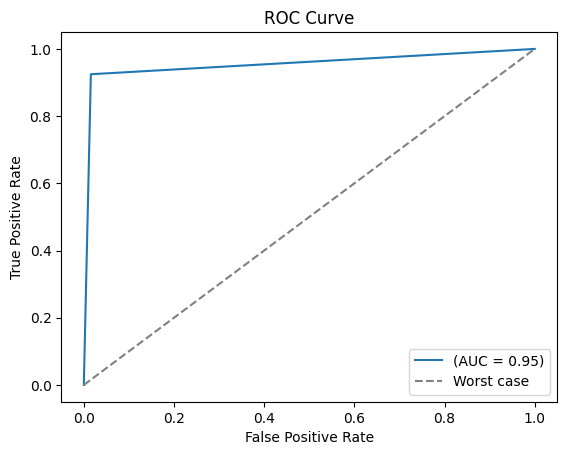

In [96]:
#AUC CURVE
fpr, tpr, thresholds = roc_curve(y_test, y_pred_kn)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'(AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], '--', color='grey', label='Worst case')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
